In [1]:
pip install missingno

  Using cached missingno-0.5.2-py3-none-any.whl (8.7 kB)
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install imbalanced-learn

  Using cached imbalanced_learn-0.12.2-py3-none-any.whl (257 kB)
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install xgboost

  Using cached xgboost-2.0.3-py3-none-manylinux2014_x86_64.whl (297.1 MB)
Note: you may need to restart the kernel to use updated packages.


# 1. Introduction

Financial institutions like banks face significant challenges in managing credit risk, which refers to the potential for a borrower to default on a loan. This can significantly impact their capital and overall financial health. Machine learning offers powerful tools to predict customer credit-worthiness, allowing banks to make informed decisions regarding loan approvals.

This project aims to develop a machine learning model for credit risk assessment using the given dataset of credit card customer information. Please note that the data is synthetic and spans over one year period. By analyzing historical data and customer characteristics, the model will estimate the likelihood of a customer defaulting on their credit card payments. This information can be crucial for banks to optimize their risk management strategies, improve lending decisions, and ultimately safeguard their financial stability.

To address these challenges and build an effective credit risk assessment model, we will delve deeper into the provided dataset through a series of investigative steps.  This exploration will guide us in selecting the most suitable techniques for data preparation, model training, and ultimately, achieving optimal performance.

Here are the key questions that will guide our analysis and model development.

- Q1: Identify the dataset size, target and features, missing data, data type and the scale.
- Q2: Identify factors that are correlating with the output variable.
- Q3: What is the best missing value imputation method.
- Q4: What is the best data resampling techniique to balance the dataset.
- Q5: What is the suitable encoding technique to use.
- Q6: What are the best features according to the feature importance. and what is the best threshold.
- Q7: Among the suitable models, which one performs the best? and why?



In [5]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
import xgboost as xgb

from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,roc_curve,auc,roc_auc_score,accuracy_score, classification_report

from imblearn.over_sampling import SMOTE

import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter("ignore", category=ConvergenceWarning)
warnings.simplefilter("ignore", category=UserWarning)



## Setting display options to enhance the number of columns and rows displayed.

pd.set_option('display.max_columns',1000)
pd.set_option('display.max_rows',1000)
pd.set_option('max_colwidth',200)
pd.options.mode.chained_assignment = None

# 2. Exploratory Data Analysis

In [6]:
## Loading the dataset and variables list

df = pd.read_table('CS_data.txt')
var_list = pd.read_excel(r'variable list.XLS.xls')

/tmp/ipykernel_175/3328799747.py:3: DtypeWarning: Columns (52,53) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_table('CS_data.txt')


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 1 to 50000
Data columns (total 54 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID_CLIENT                       50000 non-null  int64  
 1   CLERK_TYPE                      50000 non-null  object 
 2   PAYMENT_DAY                     50000 non-null  int64  
 3   APPLICATION_SUBMISSION_TYPE     50000 non-null  object 
 4   QUANT_ADDITIONAL_CARDS          50000 non-null  int64  
 5   POSTAL_ADDRESS_TYPE             50000 non-null  int64  
 6   SEX                             50000 non-null  object 
 7   MARITAL_STATUS                  50000 non-null  int64  
 8   QUANT_DEPENDANTS                50000 non-null  int64  
 9   EDUCATION_LEVEL                 826 non-null    float64
 10  STATE_OF_BIRTH                  50000 non-null  object 
 11  CITY_OF_BIRTH                   50000 non-null  object 
 12  NATIONALITY                     

In [8]:
## List of Variables

var_list

,Var_Id,Var_Title,Var_Description,Field_Content
0,1,ID_CLIENT,Sequential number for the applicant (to be used as a key),"1-50000, 50001-70000, 70001-90000"
1,2,CLERK_TYPE,Not informed,C
2,3,PAYMENT_DAY,"Day of the month for bill payment, chosen by the applicant","1,5,10,15,20,25"
3,4,APPLICATION_SUBMISSION_TYPE,Indicates if the application was submitted via the internet or in person/posted,"Web, Carga"
4,5,QUANT_ADDITIONAL_CARDS,Quantity of additional cards asked for in the same application form,"1,2,NULL"
5,6,POSTAL_ADDRESS_TYPE,Indicates if the address for posting is the home address or other. Encoding not informed.,1.2
6,7,SEX,NaN,"M=Male, F=Female"
7,8,MARITAL_STATUS,Encoding not informed,"1,2,3,4,5,6,7"
8,9,QUANT_DEPENDANTS,NaN,"0, 1, 2, ..."
9,10,EDUCATION_LEVEL,Edducational level in gradual order not informed,"1,2,3,4,5"


In [9]:
#Rename unclear variable names
## Renaming Tartget variable as 'TARGET'

df.rename(columns={'TARGET_LABEL_BAD.1':'TARGET'}, inplace = True)                     

In [10]:
df

,ID_CLIENT,CLERK_TYPE,PAYMENT_DAY,APPLICATION_SUBMISSION_TYPE,QUANT_ADDITIONAL_CARDS,POSTAL_ADDRESS_TYPE,SEX,MARITAL_STATUS,QUANT_DEPENDANTS,EDUCATION_LEVEL,STATE_OF_BIRTH,CITY_OF_BIRTH,NATIONALITY,RESIDENCIAL_STATE,RESIDENCIAL_CITY,RESIDENCIAL_BOROUGH,FLAG_RESIDENCIAL_PHONE,RESIDENCIAL_PHONE_AREA_CODE,RESIDENCE_TYPE,MONTHS_IN_RESIDENCE,FLAG_MOBILE_PHONE,FLAG_EMAIL,PERSONAL_MONTHLY_INCOME,OTHER_INCOMES,FLAG_VISA,FLAG_MASTERCARD,FLAG_DINERS,FLAG_AMERICAN_EXPRESS,FLAG_OTHER_CARDS,QUANT_BANKING_ACCOUNTS,QUANT_SPECIAL_BANKING_ACCOUNTS,PERSONAL_ASSETS_VALUE,QUANT_CARS,COMPANY,PROFESSIONAL_STATE,PROFESSIONAL_CITY,PROFESSIONAL_BOROUGH,FLAG_PROFESSIONAL_PHONE,PROFESSIONAL_PHONE_AREA_CODE,MONTHS_IN_THE_JOB,PROFESSION_CODE,OCCUPATION_TYPE,MATE_PROFESSION_CODE,EDUCATION_LEVEL.1,FLAG_HOME_ADDRESS_DOCUMENT,FLAG_RG,FLAG_CPF,FLAG_INCOME_PROOF,PRODUCT,FLAG_ACSP_RECORD,AGE,RESIDENCIAL_ZIP_3,PROFESSIONAL_ZIP_3,TARGET
1,1,C,-99999,0,0,1,F,6,1,NaN,RN,Assu,1,RN,Santana do Matos,Centro,Y,105.0,1.0,15.0,N,1,900.00,0.0,1,1,0,0,0,0,0,0.0,0,N,,NaN,NaN,N,NaN,0,9.0,4.0,NaN,NaN,0,0,0,0,1,N,32,595,595,1
2,2,C,-99999,Web,0,1,F,2,0,NaN,RJ,rio de janeiro,1,RJ,RIO DE JANEIRO,CAMPO GRANDE,Y,20.0,1.0,1.0,N,1,750.00,0.0,0,0,0,0,0,0,0,0.0,0,Y,,NaN,NaN,N,NaN,0,11.0,4.0,11.0,NaN,0,0,0,0,1,N,34,230,230,1
3,3,C,-99999,0,0,1,F,2,0,NaN,RN,GARANHUNS,1,RN,Parnamirim,Boa Esperanca,Y,105.0,1.0,NaN,N,1,500.00,0.0,0,0,0,0,0,0,0,0.0,0,N,,NaN,NaN,N,NaN,0,11.0,NaN,NaN,NaN,0,0,0,0,1,N,27,591,591,0
4,4,C,-99999,Web,0,1,F,2,0,NaN,PE,CABO,1,PE,CABO,PONTE DOS CARVALHOS,N,NaN,NaN,NaN,N,1,500.00,0.0,0,0,0,0,0,0,0,0.0,0,N,,NaN,NaN,N,NaN,0,NaN,NaN,NaN,NaN,0,0,0,0,1,N,61,545,545,0
5,5,C,-99999,Web,0,1,M,2,0,NaN,RJ,RIO DE JANEIRO,1,RJ,Rio de Janeiro,Santa Cruz,Y,20.0,1.0,12.0,N,1,1200.00,0.0,0,0,0,0,0,0,0,0.0,0,N,,NaN,NaN,N,NaN,0,9.0,5.0,NaN,NaN,0,0,0,0,1,N,48,235,235,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49996,49996,C,10,Web,0,1,F,1,2,NaN,RN,NATAL,1,RN,NATAL,PAJUCARA,Y,105.0,1.0,14.0,N,1,1451.00,0.0,0,0,0,0,0,1,1,0.0,1,N,,NaN,NaN,N,NaN,0,9.0,4.0,0.0,0.0,0,0,0,0,1,N,36,591,591,1
49997,49997,C,25,0,0,1,F,1,0,NaN,SP,LENCOIS PAULISTA,1,SP,Lencois Paulista,Nucleo Habitacional Joao Zillo,Y,12.0,1.0,15.0,N,1,450.00,0.0,0,0,0,0,0,0,0,0.0,0,N,,NaN,NaN,N,NaN,0,NaN,NaN,NaN,NaN,0,0,0,0,2,N,21,186,186,0
49998,49998,C,5,0,0,1,M,2,3,NaN,PR,RIO BONITO,1,SP,GUARULHOS,jardim vida nova,Y,5.0,2.0,5.0,N,1,1555.00,0.0,0,0,0,0,0,0,0,0.0,0,Y,SP,GUARULHOS,ITAPEGICA,Y,5.0,0,9.0,2.0,NaN,NaN,0,0,0,0,1,N,41,715,715,0
49999,49999,C,1,Web,0,1,F,1,1,NaN,SP,SAO PAULO,1,MG,CONTAGEM,VILA BELEM,Y,29.0,1.0,NaN,N,1,1443.27,0.0,0,0,0,0,0,0,0,0.0,0,Y,MG,BETIM,JARDIM ALTEROSA,Y,29.0,0,9.0,2.0,NaN,NaN,0,0,0,0,1,N,28,320,320,1


<Axes: >

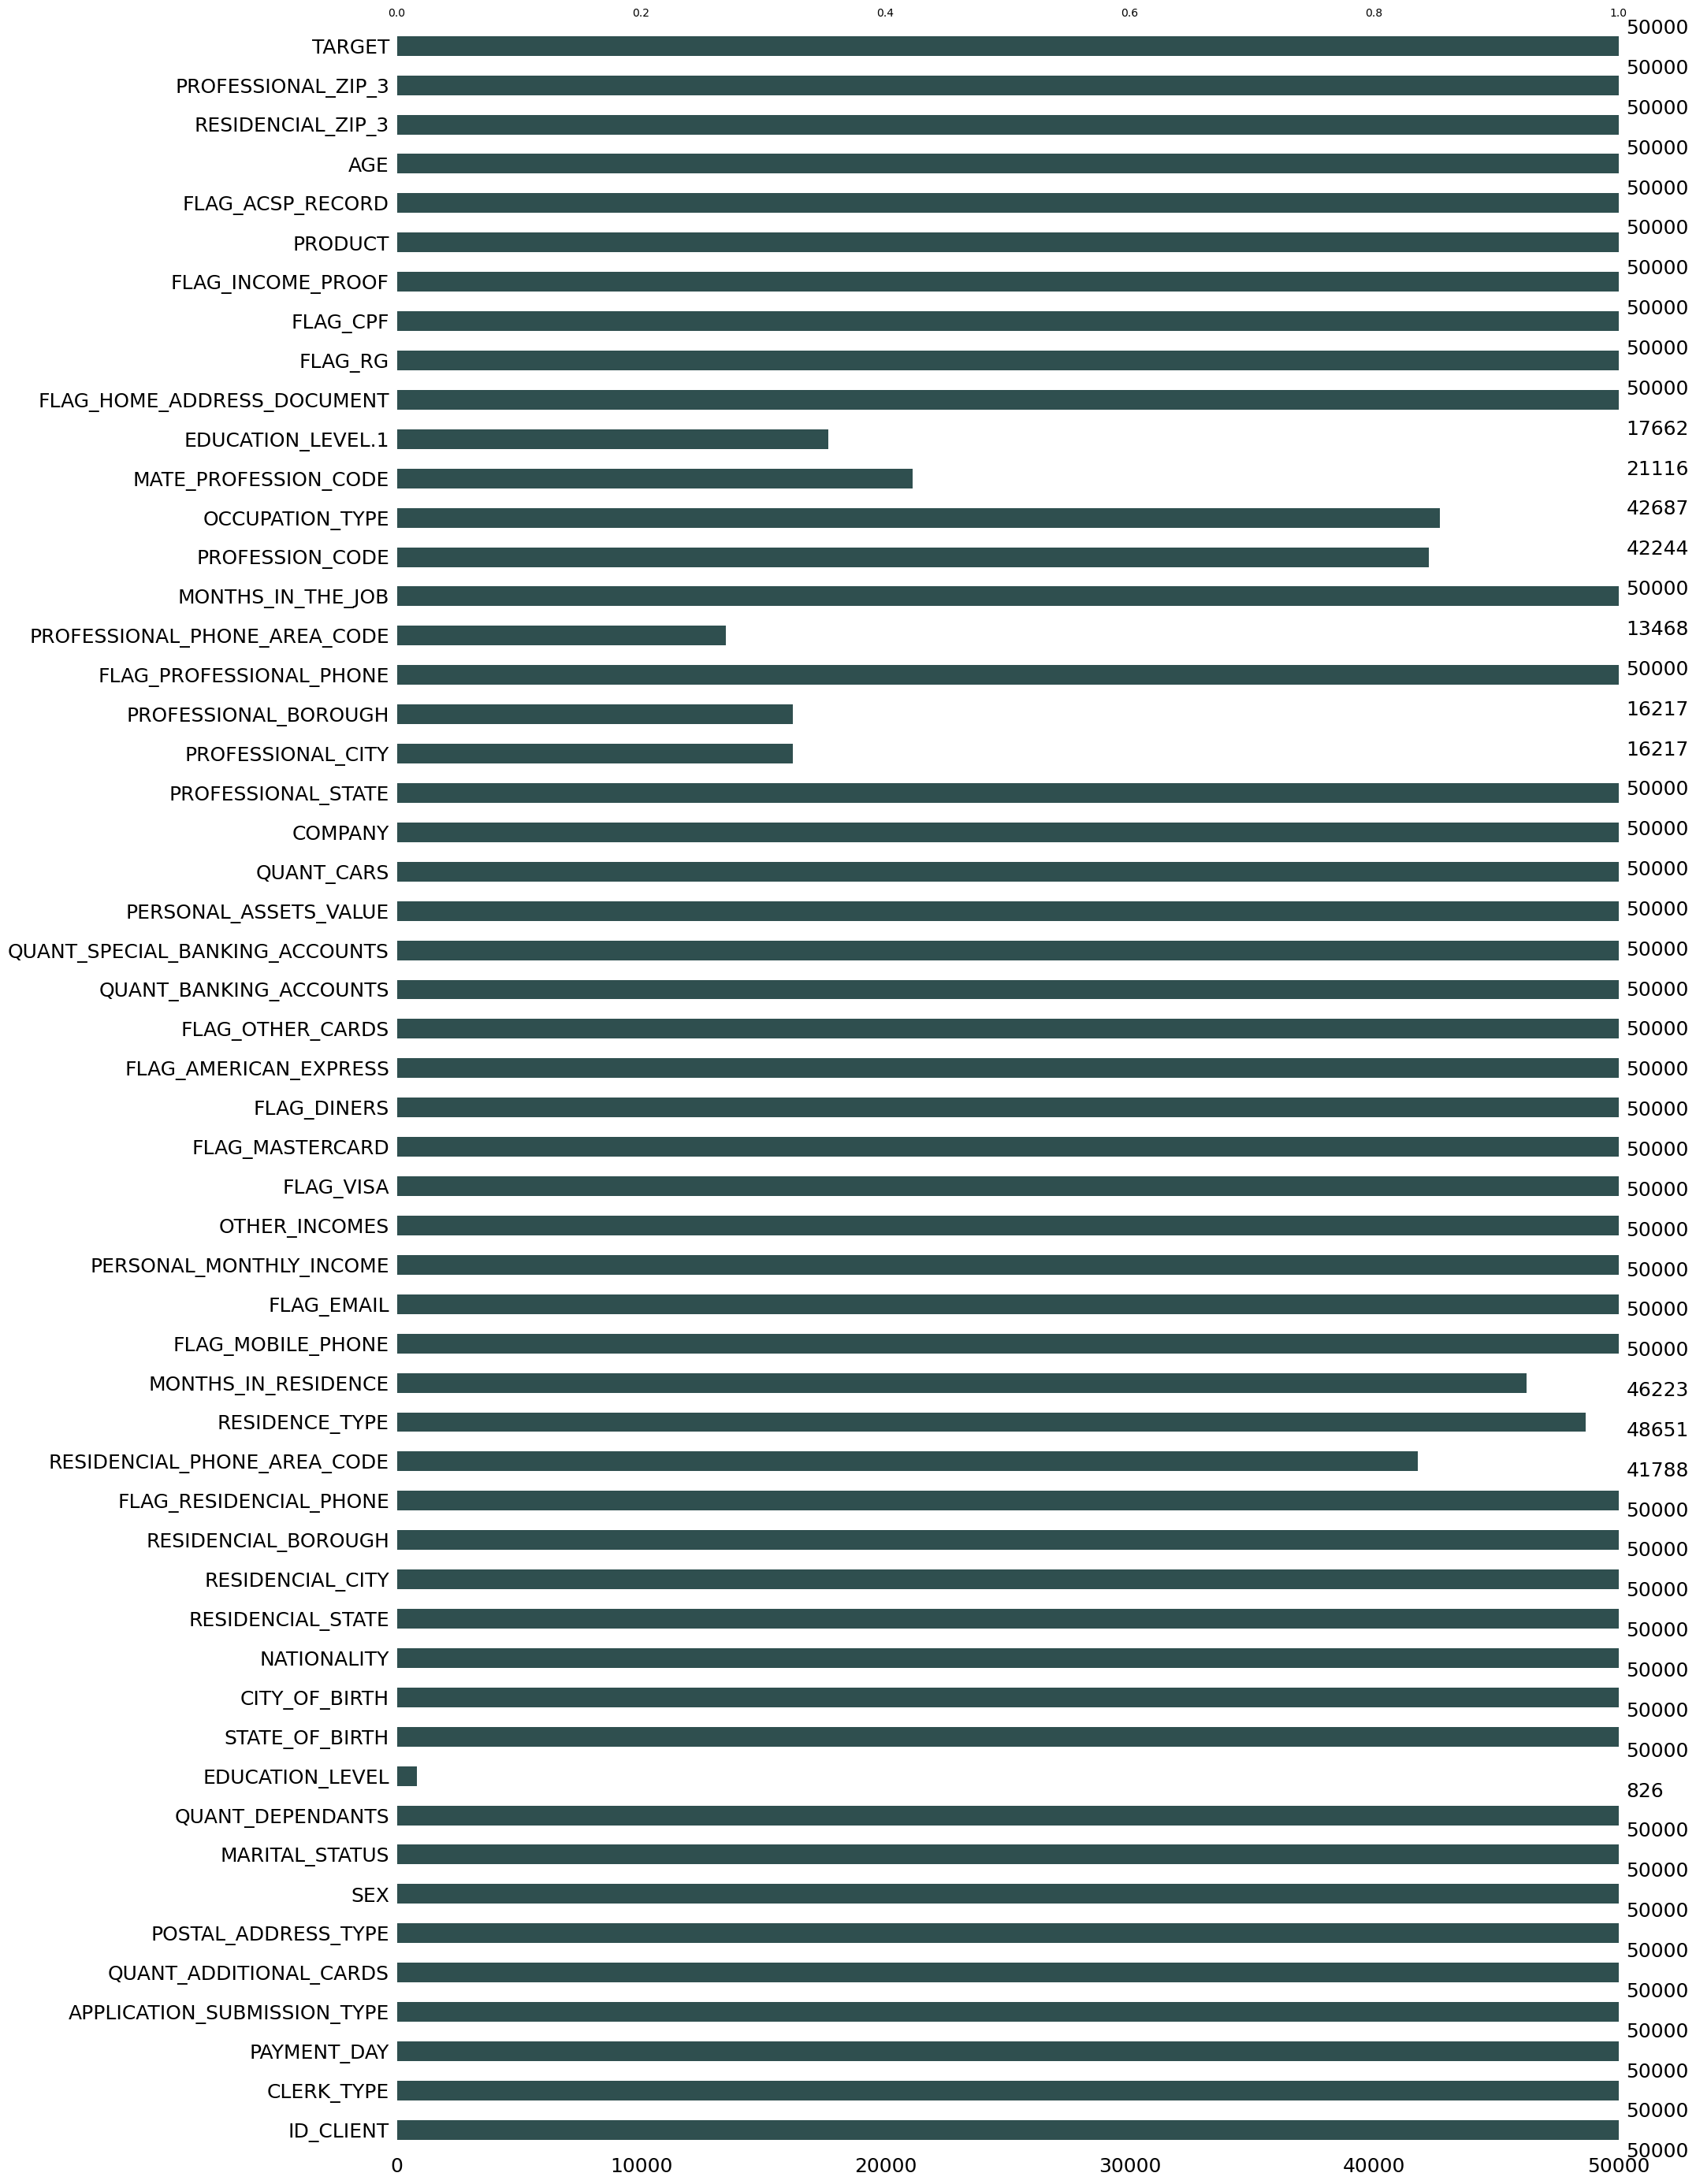

In [11]:
#Missing value ditection and visualization
msno.bar(df, figsize = (20,35), fontsize=18, color ='darkslategray')

In [12]:
## Checking for missing values

missing_values_count = df.isnull().sum()

## Filtering out the columns with missing values

missing_columns = missing_values_count[missing_values_count > 0]
missing_value_percent = (missing_columns / len(df)) * 100
missing_value_percent

EDUCATION_LEVEL                 98.348
RESIDENCIAL_PHONE_AREA_CODE     16.424
RESIDENCE_TYPE                   2.698
MONTHS_IN_RESIDENCE              7.554
PROFESSIONAL_CITY               67.566
PROFESSIONAL_BOROUGH            67.566
PROFESSIONAL_PHONE_AREA_CODE    73.064
PROFESSION_CODE                 15.512
OCCUPATION_TYPE                 14.626
MATE_PROFESSION_CODE            57.768
EDUCATION_LEVEL.1               64.676
dtype: float64

In [13]:
## Total number of missing values

missing_columns.sum()

242901

In [14]:
## Descriptive Statistics

df.describe().applymap('{:,.2f}'.format) 

,ID_CLIENT,PAYMENT_DAY,QUANT_ADDITIONAL_CARDS,POSTAL_ADDRESS_TYPE,MARITAL_STATUS,QUANT_DEPENDANTS,EDUCATION_LEVEL,NATIONALITY,RESIDENCIAL_PHONE_AREA_CODE,RESIDENCE_TYPE,MONTHS_IN_RESIDENCE,FLAG_EMAIL,PERSONAL_MONTHLY_INCOME,OTHER_INCOMES,FLAG_VISA,FLAG_MASTERCARD,FLAG_DINERS,FLAG_AMERICAN_EXPRESS,FLAG_OTHER_CARDS,QUANT_BANKING_ACCOUNTS,QUANT_SPECIAL_BANKING_ACCOUNTS,PERSONAL_ASSETS_VALUE,QUANT_CARS,PROFESSIONAL_PHONE_AREA_CODE,MONTHS_IN_THE_JOB,PROFESSION_CODE,OCCUPATION_TYPE,MATE_PROFESSION_CODE,EDUCATION_LEVEL.1,FLAG_HOME_ADDRESS_DOCUMENT,FLAG_RG,FLAG_CPF,FLAG_INCOME_PROOF,PRODUCT,AGE,TARGET
count,"50,000.00","50,000.00","50,000.00","50,000.00","50,000.00","50,000.00",826.00,"50,000.00","41,788.00","48,651.00","46,223.00","50,000.00","50,000.00","50,000.00","50,000.00","50,000.00","50,000.00","50,000.00","50,000.00","50,000.00","50,000.00","50,000.00","50,000.00","13,468.00","50,000.00","42,244.00","42,687.00","21,116.00","17,662.00","50,000.00","50,000.00","50,000.00","50,000.00","50,000.00","50,000.00","50,000.00"
mean,"25,000.50",-167.15,0.00,1.01,2.15,0.65,1.72,0.96,64.54,1.25,9.73,0.80,886.68,35.43,0.11,0.10,0.00,0.00,0.00,0.36,0.36,"2,322.37",0.34,62.40,0.01,8.06,2.48,3.80,0.30,0.00,0.00,0.00,0.00,1.28,43.25,0.26
std,"14,433.90","4,239.37",0.00,0.08,1.32,1.19,0.45,0.20,38.51,0.87,10.67,0.40,"7,846.96",891.52,0.31,0.30,0.04,0.04,0.05,0.48,0.48,"42,357.98",0.47,36.62,0.38,3.22,1.53,5.21,0.96,0.00,0.00,0.00,0.00,0.99,14.99,0.44
min,1.00,"-99,999.00",0.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,60.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,6.00,0.00
25%,"12,500.75",10.00,0.00,1.00,1.00,0.00,1.00,1.00,29.00,1.00,1.00,1.00,360.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,29.00,0.00,9.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,31.00,0.00
50%,"25,000.50",10.00,0.00,1.00,2.00,0.00,2.00,1.00,68.00,1.00,6.00,1.00,500.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,66.00,0.00,9.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,41.00,0.00
75%,"37,500.25",15.00,0.00,1.00,2.00,1.00,2.00,1.00,100.00,1.00,15.00,1.00,800.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,1.00,97.00,0.00,9.00,4.00,11.00,0.00,0.00,0.00,0.00,0.00,1.00,53.00,1.00
max,"50,000.00",25.00,0.00,2.00,7.00,53.00,2.00,2.00,126.00,5.00,228.00,1.00,"959,000.00","194,344.00",1.00,1.00,1.00,1.00,1.00,2.00,2.00,"6,000,000.00",1.00,126.00,35.00,18.00,5.00,17.00,5.00,0.00,0.00,0.00,0.00,7.00,106.00,1.00


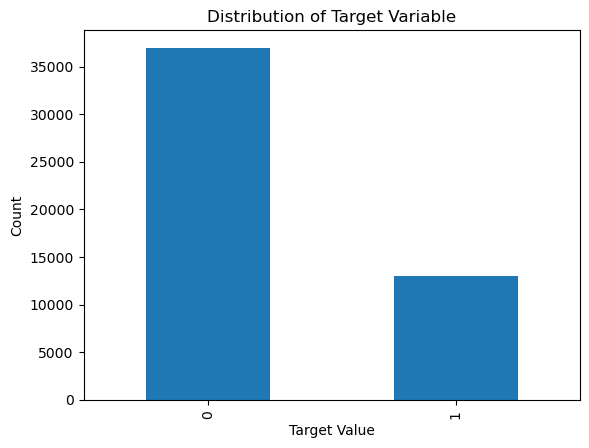

In [15]:
#Explore the target variable 'TARGET'


df['TARGET'].value_counts().plot(kind='bar')
plt.title('Distribution of Target Variable')
plt.xlabel('Target Value')
plt.ylabel('Count')
plt.show()

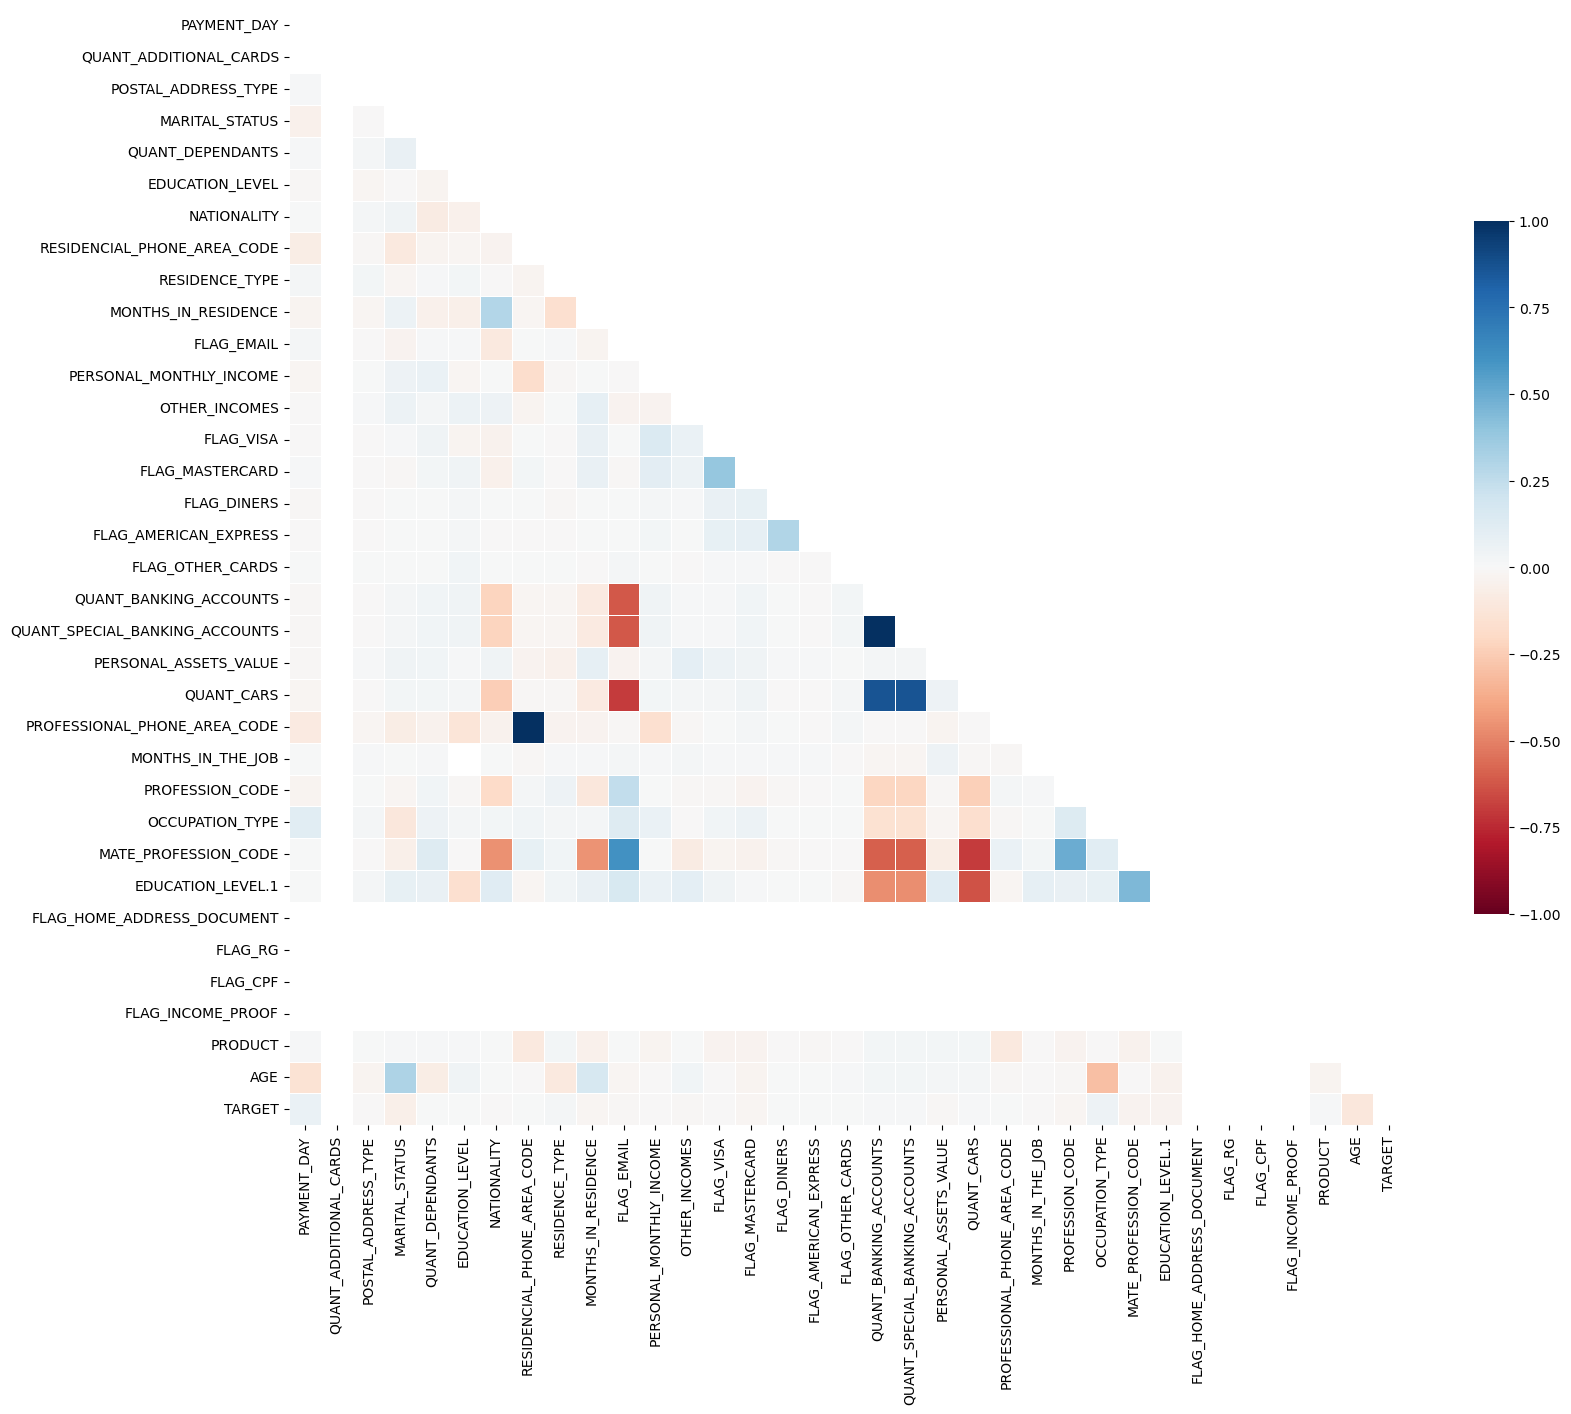

In [16]:
# Correlation heatmap of all variables

def correlation(df):
    corr = df.corr(method = 'spearman')
    f, ax = plt.subplots(figsize=(18,18))
    cmap =  'RdBu'
    mask = np.triu(np.ones_like(corr, dtype=bool))
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1,vmin=-1, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})
    return

# Dropping ID column and visualize the correlation map

correlation(df.iloc[:,1:])

In [17]:
# Create a function to get a matrix of visualizations. 

def bubbleplot(features):
    fig, axes = plt.subplots(nrows=len(features), ncols=len(features), figsize=(15, 15))

    for i, row in enumerate(features):
        for j, col in enumerate(features):
            if i == j:
                
                ## Count plot in the diagonal
                sns.countplot(data=df, x=col, ax=axes[i, j])

            if i != j:
                counts = df.groupby([col, row]).size().reset_index(name='count')
                sns.scatterplot(data=counts, x=col, y=row, size=counts['count'], sizes=(20, 1000), ax=axes[i, j],legend =False)

    plt.tight_layout()
    plt.show()
    return

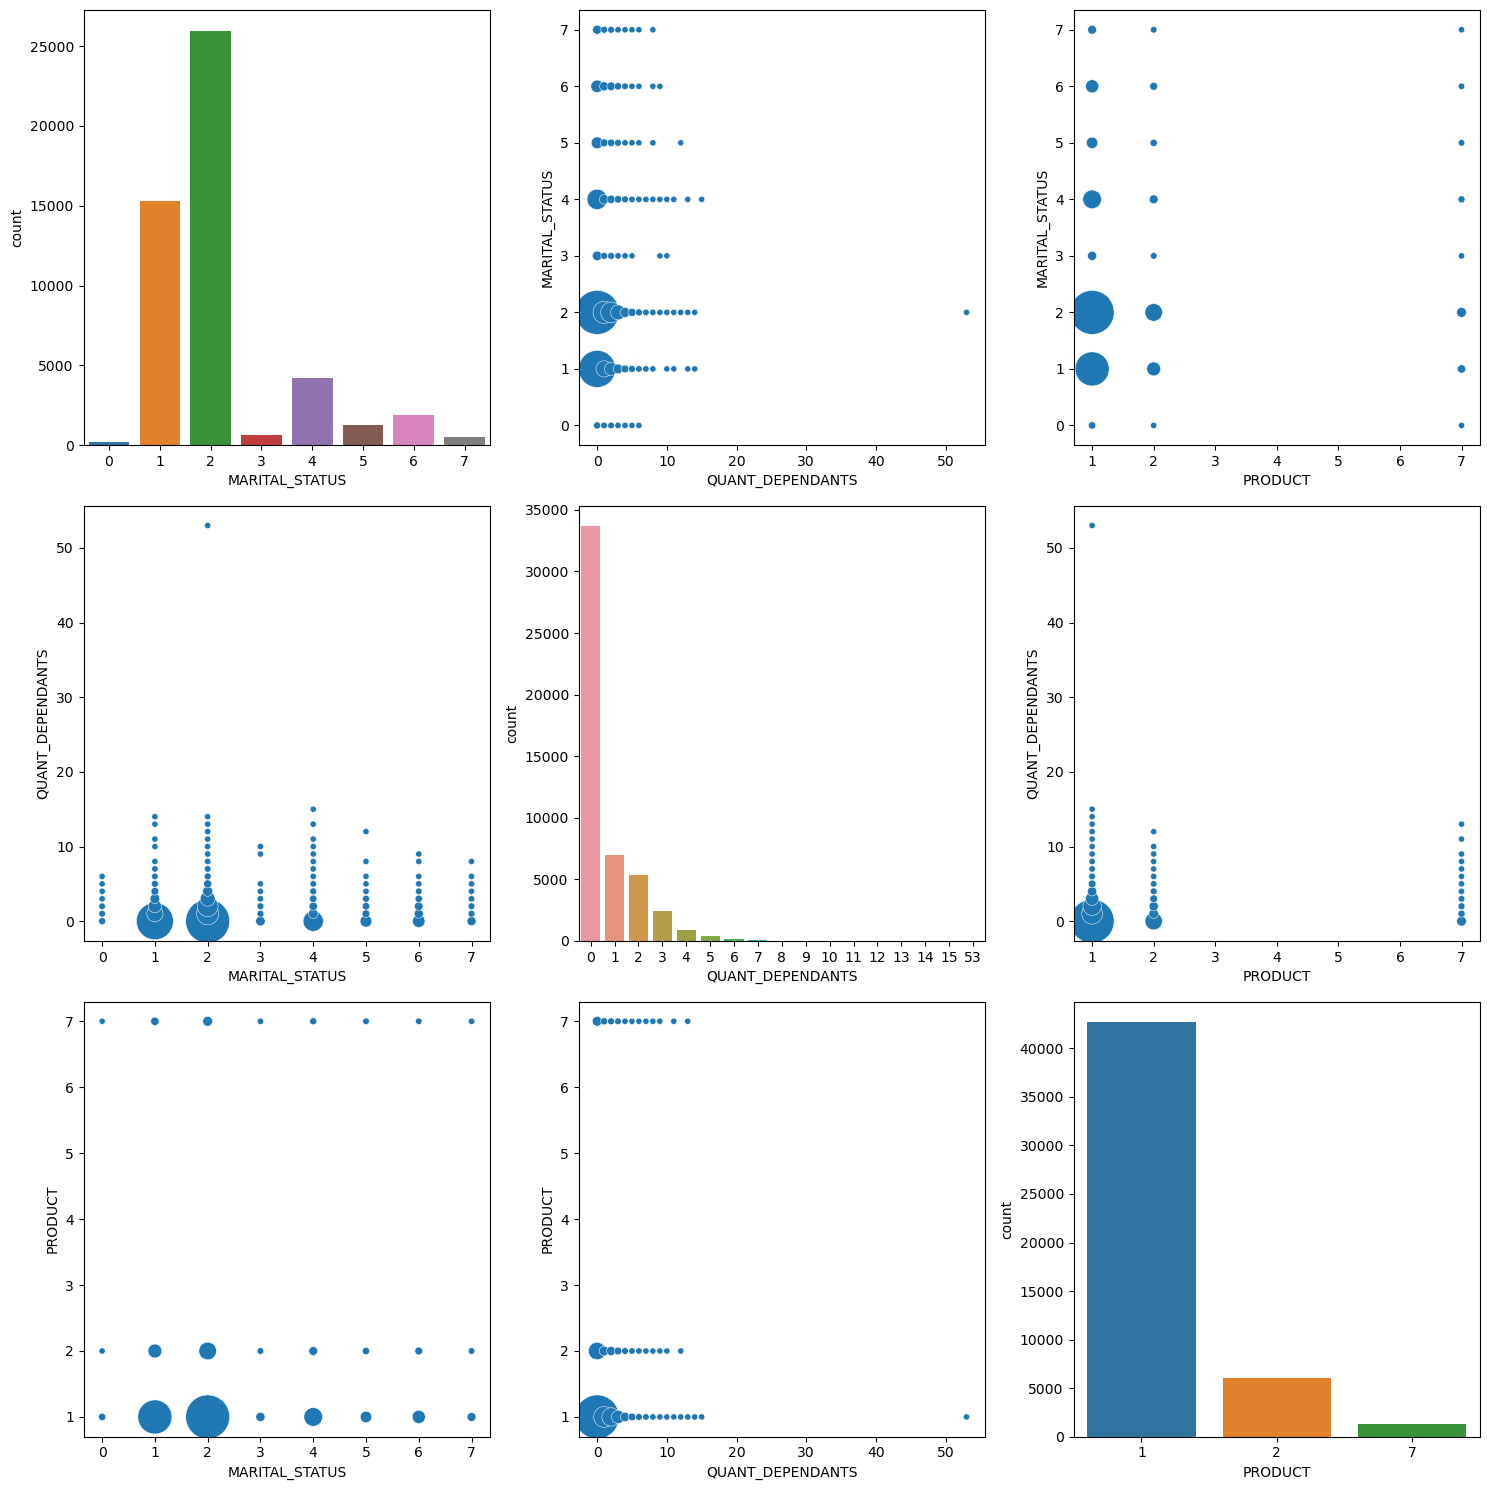

In [18]:
## Visualizing some of the categorical customer demographics against requested product

features_1 = ['MARITAL_STATUS', 'QUANT_DEPENDANTS', 'PRODUCT']

bubbleplot(features_1)

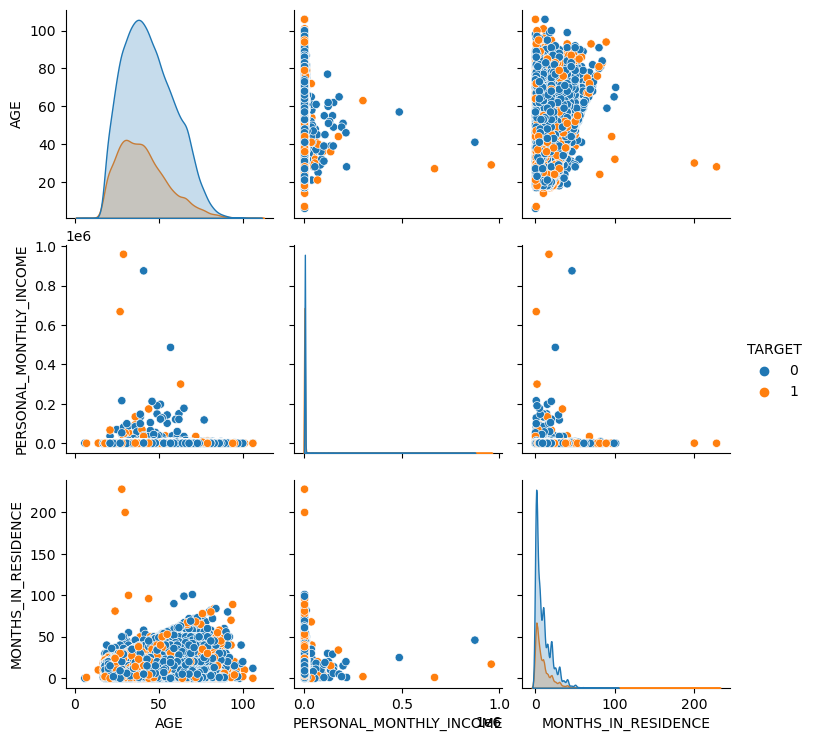

In [19]:
# Pairplot to visualize numerical demographic data against Target variable

sns.pairplot(df[['AGE', 'PERSONAL_MONTHLY_INCOME', 'MONTHS_IN_RESIDENCE', 'TARGET']], hue = 'TARGET')

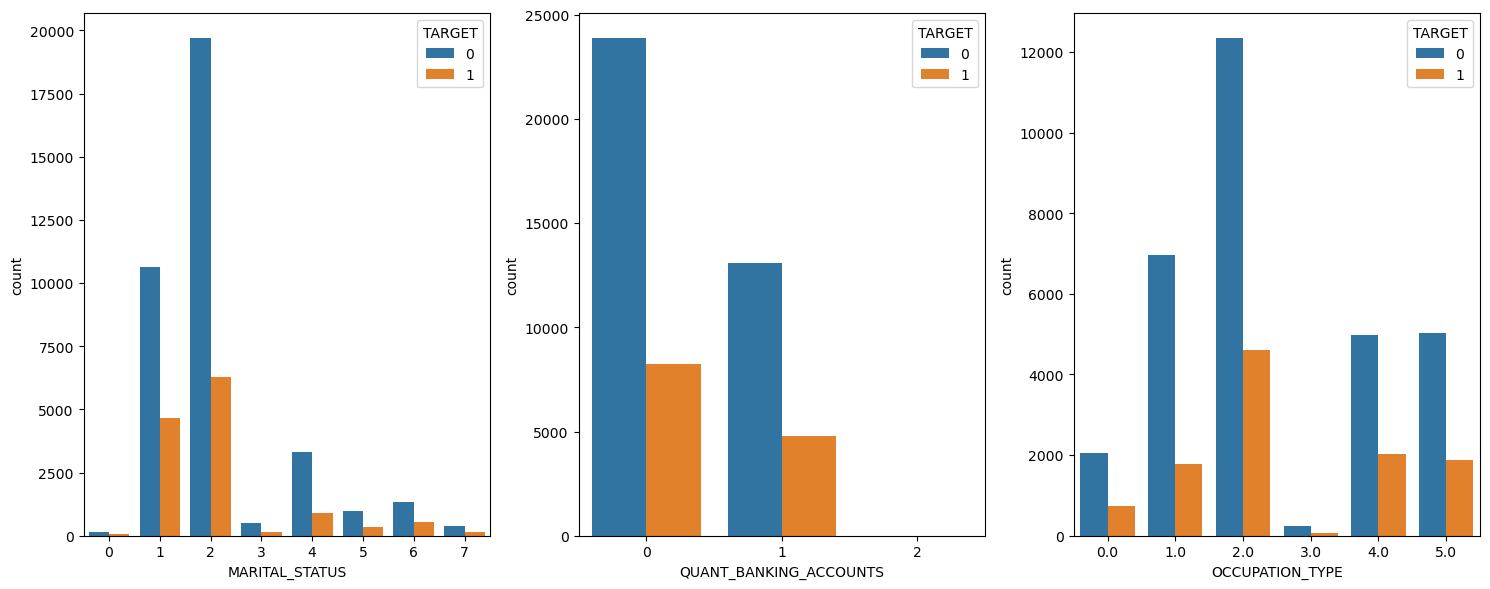

In [20]:
## Target variable distribution across diferent features

features_2 =  ['MARITAL_STATUS','QUANT_BANKING_ACCOUNTS', 'OCCUPATION_TYPE']

fig, axes = plt.subplots(nrows = 1, ncols = len(features_2), figsize = (15,6))
for i,col in enumerate(features_2):
    sns.countplot(data=df, x=col, hue = 'TARGET', ax = axes[i])
plt.tight_layout()

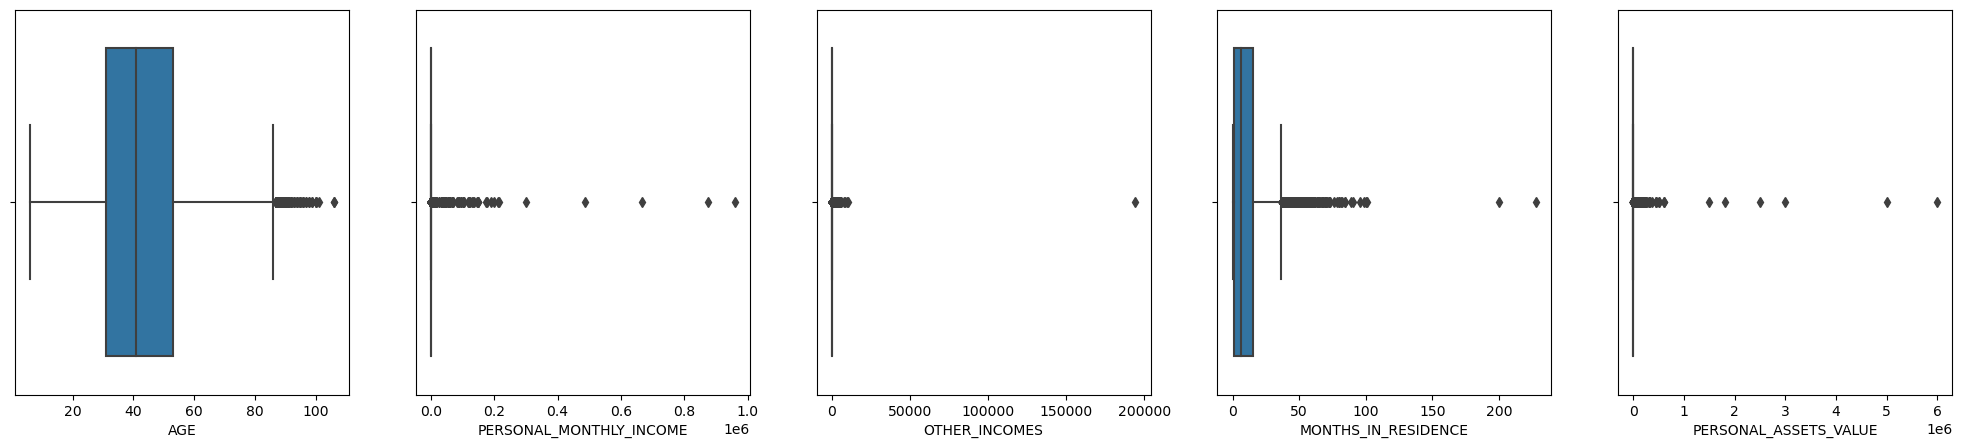

In [21]:
## Boxplots to get the distribution of numerical features and to check for outliers

essential_num_features = ['AGE', 'PERSONAL_MONTHLY_INCOME','OTHER_INCOMES', 'MONTHS_IN_RESIDENCE', 'PERSONAL_ASSETS_VALUE']

fig, axes = plt.subplots(nrows = 1, ncols = len(essential_num_features), figsize = (25,5))
for i,col in enumerate(essential_num_features):
    sns.boxplot(data=df, x=col, ax = axes[i])

# Data Preprocessing

Data preprocessing is a crucial part before modeling. Here three main steps are considered. 

- Handling Missing Values, Errors and Outliers
- Eliminating features that include free text
- Dominant Category Removal
- Correlation Analysis
- Domain Expertise Integration 


### Handling Missing Values, Errors and Outliers

According to the EDA there are high number of missing values (more than 20%) in the following features. Due to it's heavy presence it is better to drop these columns than impute because no imputation methods will be effective. 

In [22]:
# Features with missing value percentage above 20%

missing_value_percent[missing_value_percent>20]

EDUCATION_LEVEL                 98.348
PROFESSIONAL_CITY               67.566
PROFESSIONAL_BOROUGH            67.566
PROFESSIONAL_PHONE_AREA_CODE    73.064
MATE_PROFESSION_CODE            57.768
EDUCATION_LEVEL.1               64.676
dtype: float64

In [23]:
## Removing columns with high missing value percentage

drop_list_1 = missing_value_percent[missing_value_percent > 20].index.to_list()

df = df.drop(columns = drop_list_1)

df.shape

(50000, 48)

Following features have a less number of missing values (less than 20%). Let's look at different imputation methods according to data category. 

In [24]:
# Features with missing value percentage less than 20%

missing_value_percent[missing_value_percent<20]

RESIDENCIAL_PHONE_AREA_CODE    16.424
RESIDENCE_TYPE                  2.698
MONTHS_IN_RESIDENCE             7.554
PROFESSION_CODE                15.512
OCCUPATION_TYPE                14.626
dtype: float64

Categorical data will be Mode imputed and Numerical data willbe Mean imputed. Imputation of missing values is considered the best option, as removing them will lead to less number of records which can impact the accuracy of the ML models.

In [25]:
# Imputing missing values in categorical columns with mode

df['RESIDENCE_TYPE'] = df['RESIDENCE_TYPE'].fillna(df['RESIDENCE_TYPE'].mode()[0])
df['PROFESSION_CODE'] = df['PROFESSION_CODE'].fillna(df['PROFESSION_CODE'].mode()[0])
df['OCCUPATION_TYPE'] = df['OCCUPATION_TYPE'].fillna(df['OCCUPATION_TYPE'].mode()[0])
df['RESIDENCIAL_PHONE_AREA_CODE'] = df['RESIDENCIAL_PHONE_AREA_CODE'].fillna(df['RESIDENCIAL_PHONE_AREA_CODE'].mode()[0])


In [26]:
## Imputing missing values in numerical columns with mean

df['MONTHS_IN_RESIDENCE'] = df['MONTHS_IN_RESIDENCE'].fillna(df['MONTHS_IN_RESIDENCE'].mean())

In [27]:
## Errors in PAYMENT_DAY Column
df['PAYMENT_DAY'].value_counts()

 10       20387
 15        8731
 5         7334
 25        7013
 20        4687
 1         1758
-99999       90
Name: PAYMENT_DAY, dtype: int64

In [28]:
## Treating error values in the PAYMENT_DAY Column

df['PAYMENT_DAY'] = df['PAYMENT_DAY'].replace(-99999, df['PAYMENT_DAY'].mode()[0])  

<Axes: >

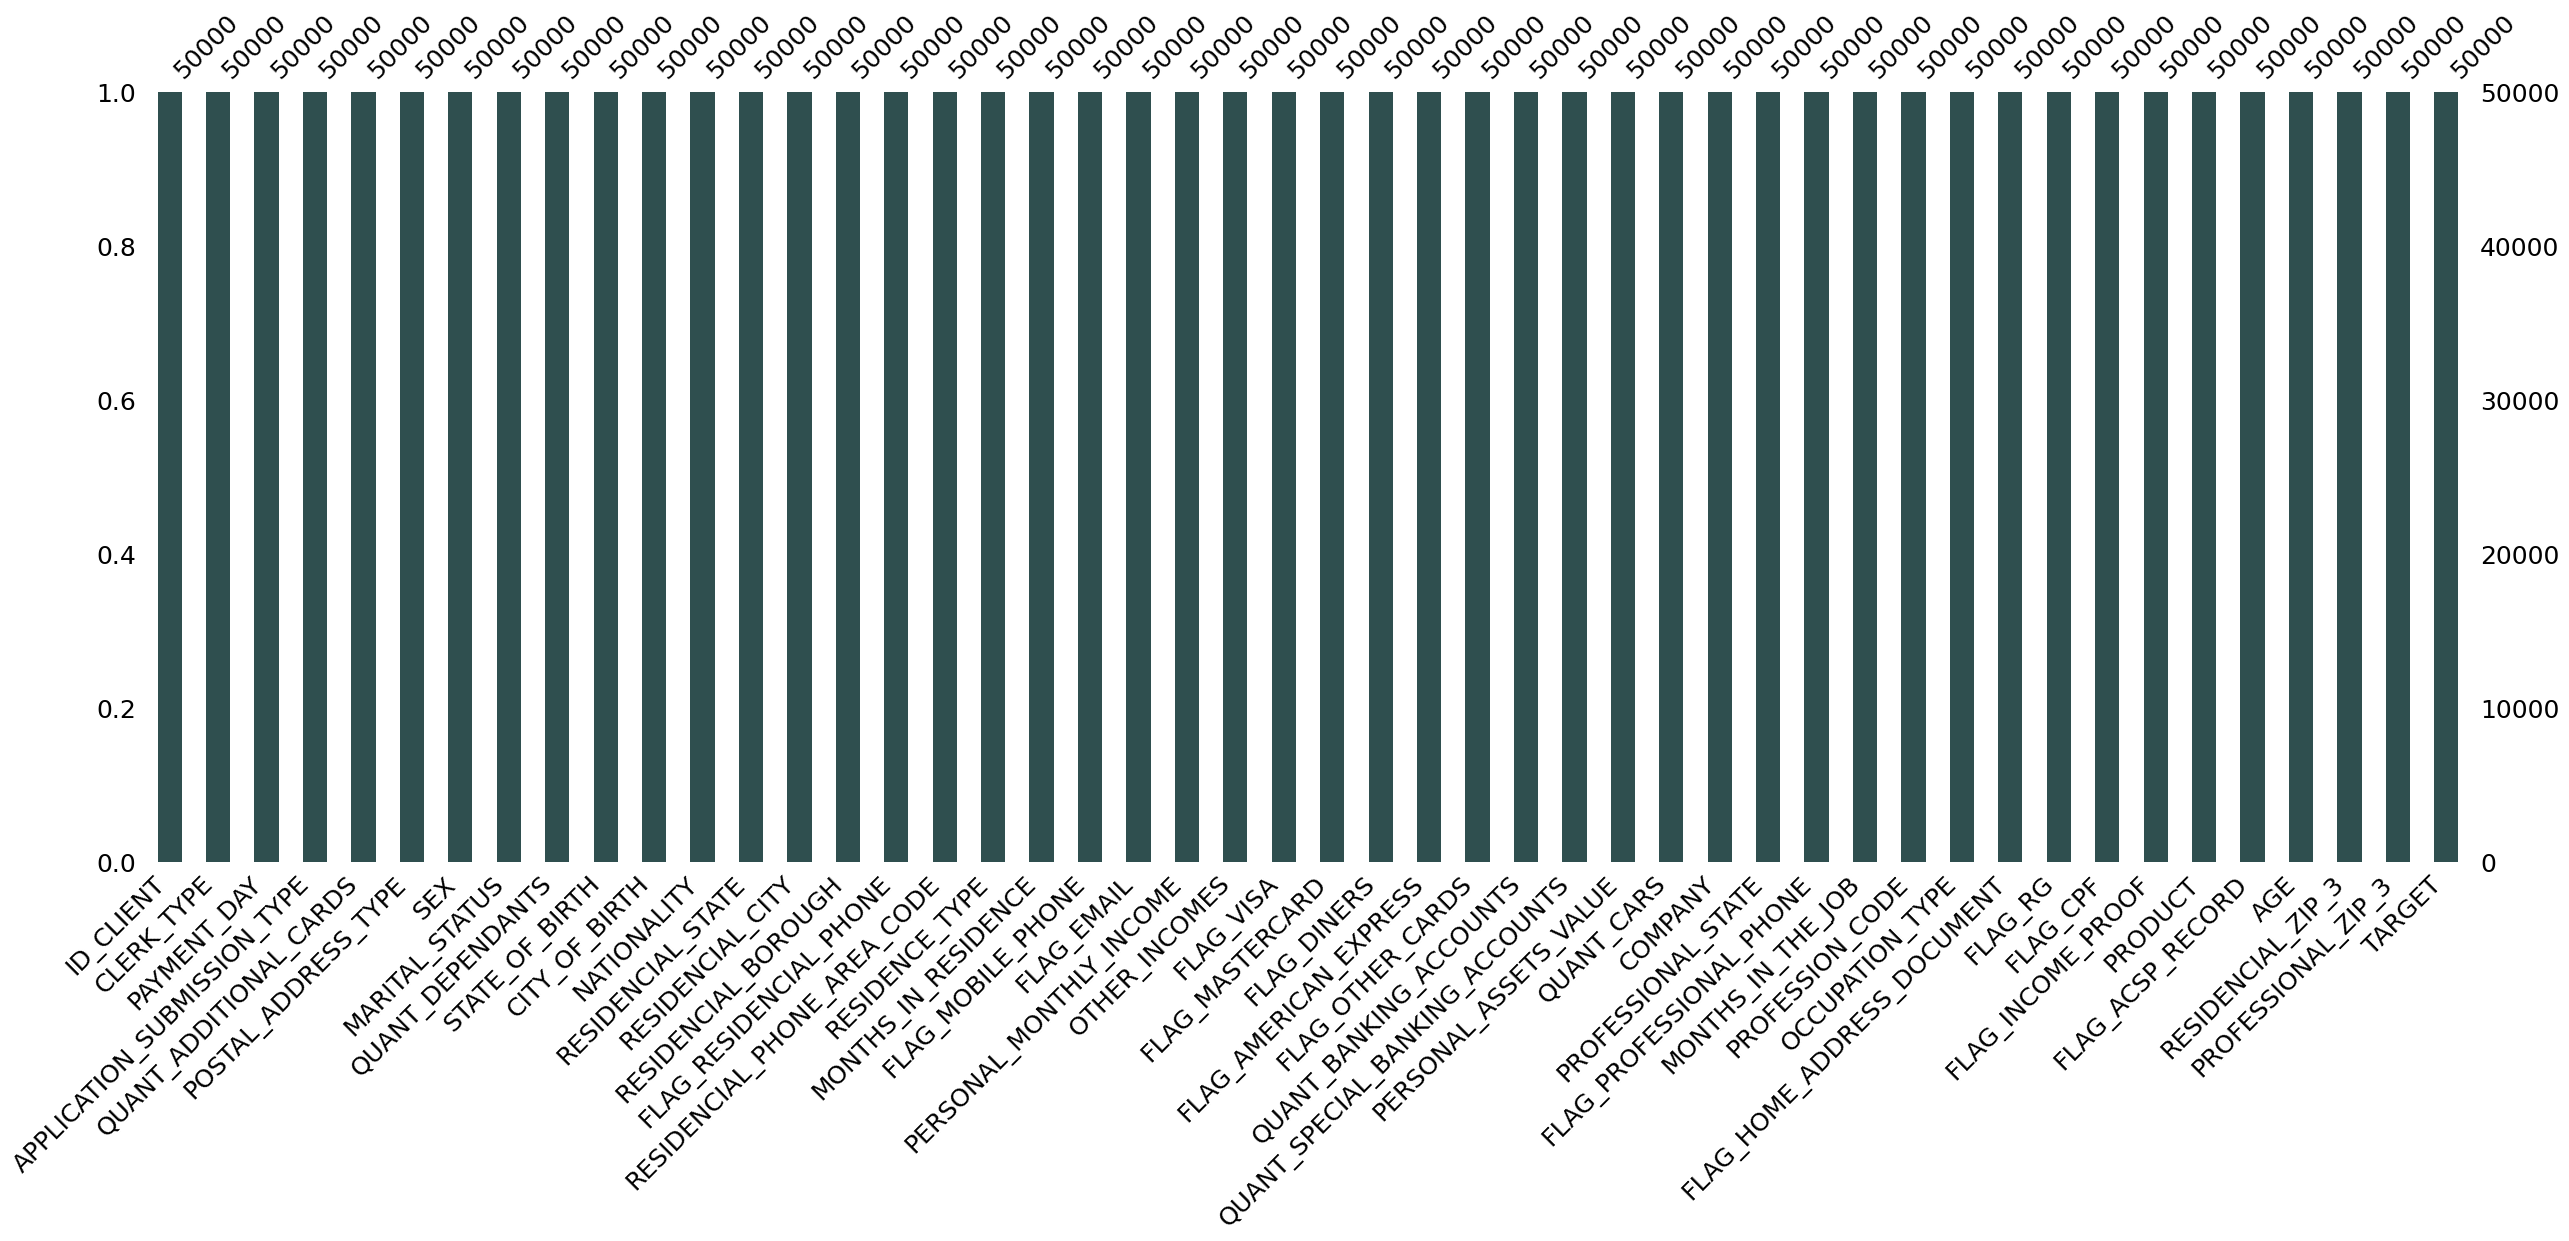

In [29]:
# Check for Missing Values after Imputation
msno.bar(df, figsize = (30,10), fontsize=18, color ='darkslategray')

### Treating Outliers : Winsorizing Method

Winsorization addresses the influence of outliers in statistical analysis by capping extreme values. It replaces outliers with values at pre-defined percentiles (i.e., 5th and 95th percentile). This reduces the impact of outliers on metrics like mean or standard deviation, providing more robust estimates.

In [30]:
## Function to create box plots( given the dataframe, feature names and figsize)

def create_boxplots(data_frame, cols, figsize=(12 , 6)):
    
    fig, axes = plt.subplots(ncols=len(cols), figsize=figsize)

    for i, col in enumerate(cols):
        axes[i].boxplot(data_frame[col])
        axes[i].set( title=col)  
    plt.tight_layout()  
    plt.show()

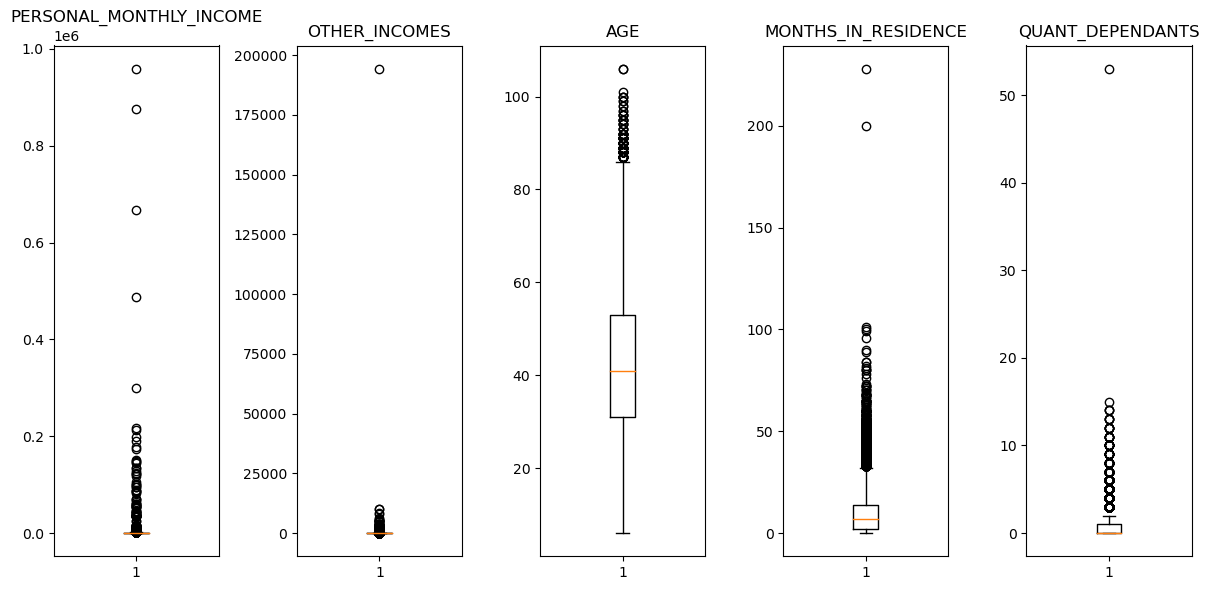

In [31]:
## Selecting Numerical columns

num_cols  = ['PERSONAL_MONTHLY_INCOME','OTHER_INCOMES', 'AGE', 'MONTHS_IN_RESIDENCE', 'QUANT_DEPENDANTS']

create_boxplots(df[num_cols] , num_cols, (12,6))

In [32]:
#Let's check at descriptive statistics of numerical columns before Winsorizing

df[num_cols].describe().applymap('{:,.3f}'.format).transpose()

,count,mean,std,min,25%,50%,75%,max
PERSONAL_MONTHLY_INCOME,"50,000.000",886.678,"7,846.959",60.000,360.000,500.000,800.000,"959,000.000"
OTHER_INCOMES,"50,000.000",35.435,891.515,0.000,0.000,0.000,0.000,"194,344.000"
AGE,"50,000.000",43.249,14.989,6.000,31.000,41.000,53.000,106.000
MONTHS_IN_RESIDENCE,"50,000.000",9.727,10.258,0.000,2.000,7.000,14.000,228.000
QUANT_DEPENDANTS,"50,000.000",0.651,1.194,0.000,0.000,0.000,1.000,53.000


In [33]:
## Winsorizing using mstats.winsorize
## custom upper and lower thresolds have set based on nature and quanitity of outliers of each feature

stats.mstats.winsorize(a=df['PERSONAL_MONTHLY_INCOME'], limits=(0.001, 0.05), inplace = True)

stats.mstats.winsorize(a=df['OTHER_INCOMES'], limits=(0, 0.05), inplace = True)

stats.mstats.winsorize(a=df['AGE'], limits=(0.001, 0.001), inplace = True)

stats.mstats.winsorize(a=df['MONTHS_IN_RESIDENCE'], limits=(0, 0.01), inplace = True)

stats.mstats.winsorize(a=df['QUANT_DEPENDANTS'], limits=(0, 0.001), inplace = True)

masked_array(data=[1, 0, 0, ..., 3, 1, 2],
             mask=False,
       fill_value=999999)

In [34]:
# Here is the after version of winsorizing. No extreme Outliers!

df[num_cols].describe().applymap('{:,.3f}'.format).transpose()

,count,mean,std,min,25%,50%,75%,max
PERSONAL_MONTHLY_INCOME,"50,000.000",659.293,414.170,141.000,360.000,500.000,800.000,"1,802.000"
OTHER_INCOMES,"50,000.000",8.000,33.362,0.000,0.000,0.000,0.000,150.000
AGE,"50,000.000",43.245,14.972,18.000,31.000,41.000,53.000,90.000
MONTHS_IN_RESIDENCE,"50,000.000",9.647,9.857,0.000,2.000,7.000,14.000,45.000
QUANT_DEPENDANTS,"50,000.000",0.647,1.150,0.000,0.000,0.000,1.000,8.000


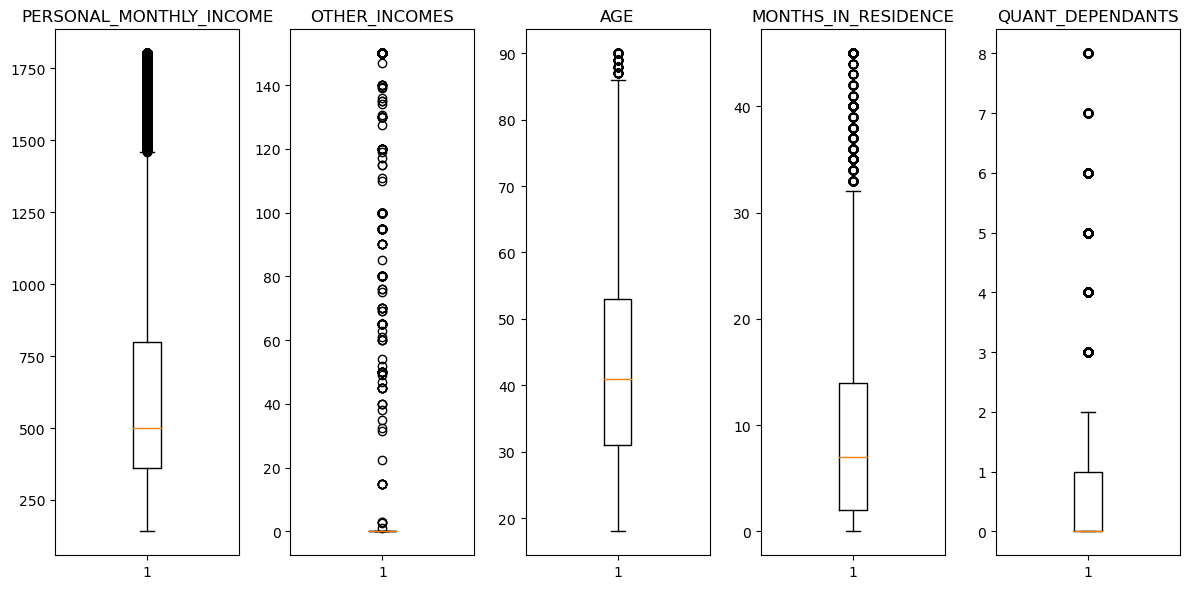

In [35]:
## Visualization after winsorizing

create_boxplots(df[num_cols] , num_cols, (12,6))

### Text Examination
Features containing free text entries will be assessed. We will determine if these features require conversion into a numerical format suitable for modeling or if they should be excluded altogether.

Following features include geographical data of the clients, which do not hold a great significance. 

- CITY_OF_BIRTH
- RESIDENCIAL_CITY
- RESIDENCIAL_BOROUGH
- STATE_OF_BIRTH

In [36]:
## Dropping text columns

drop_list_2 = ['CITY_OF_BIRTH','RESIDENCIAL_CITY','RESIDENCIAL_BOROUGH','STATE_OF_BIRTH']

df.drop(columns = drop_list_2, inplace=True)

df.shape

(50000, 44)

### Dominant Category Removal
Let's identify and remove categorical features where a single category holds a disproportionately large share of the data. These features offer minimal predictive power.

In [37]:
## Setting threshold to 95%. 

threshold = 0.95


for col in df.select_dtypes(include=['object', 'float', 'int']):
    value_counts = df[col].value_counts(normalize=True)
    if value_counts.iloc[0] > threshold:
        print (col, round(value_counts.iloc[0],4))

CLERK_TYPE 1.0
QUANT_ADDITIONAL_CARDS 1.0
POSTAL_ADDRESS_TYPE 0.9935
NATIONALITY 0.9577
FLAG_MOBILE_PHONE 1.0
FLAG_DINERS 0.9987
FLAG_AMERICAN_EXPRESS 0.9983
FLAG_OTHER_CARDS 0.998
PERSONAL_ASSETS_VALUE 0.9522
MONTHS_IN_THE_JOB 0.9985
FLAG_HOME_ADDRESS_DOCUMENT 1.0
FLAG_RG 1.0
FLAG_CPF 1.0
FLAG_INCOME_PROOF 1.0
FLAG_ACSP_RECORD 1.0


In [38]:
## Getting Value Counts to get an idea about their distribution and importance to the model

print(df['CLERK_TYPE'].value_counts())
print(df['QUANT_ADDITIONAL_CARDS'].value_counts())
print(df['POSTAL_ADDRESS_TYPE'].value_counts())
print(df['NATIONALITY'].value_counts())
print(df['FLAG_MOBILE_PHONE'].value_counts())
print(df['FLAG_DINERS'].value_counts())
print(df['FLAG_AMERICAN_EXPRESS'].value_counts())
print(df['FLAG_OTHER_CARDS'].value_counts())
print(df['FLAG_HOME_ADDRESS_DOCUMENT'].value_counts())
print(df['FLAG_RG'].value_counts())
print(df['FLAG_CPF'].value_counts())
print(df['FLAG_INCOME_PROOF'].value_counts())
print(df['FLAG_ACSP_RECORD'].value_counts())


C    50000
Name: CLERK_TYPE, dtype: int64
0    50000
Name: QUANT_ADDITIONAL_CARDS, dtype: int64
1    49673
2      327
Name: POSTAL_ADDRESS_TYPE, dtype: int64
1    47884
0     2018
2       98
Name: NATIONALITY, dtype: int64
N    50000
Name: FLAG_MOBILE_PHONE, dtype: int64
0    49934
1       66
Name: FLAG_DINERS, dtype: int64
0    49913
1       87
Name: FLAG_AMERICAN_EXPRESS, dtype: int64
0    49898
1      102
Name: FLAG_OTHER_CARDS, dtype: int64
0    50000
Name: FLAG_HOME_ADDRESS_DOCUMENT, dtype: int64
0    50000
Name: FLAG_RG, dtype: int64
0    50000
Name: FLAG_CPF, dtype: int64
0    50000
Name: FLAG_INCOME_PROOF, dtype: int64
N    50000
Name: FLAG_ACSP_RECORD, dtype: int64


In [39]:
# Lets look at the dominant value of below numerical features 

print('PERSONAL_ASSETS_VALUE')
print('Mode :', df['PERSONAL_ASSETS_VALUE'].mode().iloc[0], '     Mode Count :', df['PERSONAL_ASSETS_VALUE'].value_counts().iloc[0])
print('MONTHS_IN_THE_JOB')
print('Mode :', df['MONTHS_IN_THE_JOB'].mode().iloc[0], '     Mode Count :', df['MONTHS_IN_THE_JOB'].value_counts().iloc[0])

PERSONAL_ASSETS_VALUE
Mode : 0.0      Mode Count : 47609
MONTHS_IN_THE_JOB
Mode : 0      Mode Count : 49924


In [40]:
#Removing Columns

drop_list_3 = ['CLERK_TYPE', 'QUANT_ADDITIONAL_CARDS', 'POSTAL_ADDRESS_TYPE', 'NATIONALITY', 'PERSONAL_ASSETS_VALUE',
               'MONTHS_IN_THE_JOB', 'FLAG_MOBILE_PHONE', 'FLAG_DINERS', 'FLAG_AMERICAN_EXPRESS', 'FLAG_OTHER_CARDS',
              'FLAG_HOME_ADDRESS_DOCUMENT', 'FLAG_RG', 'FLAG_CPF', 'FLAG_INCOME_PROOF', 'FLAG_ACSP_RECORD']

df = df.drop(columns = drop_list_3)               

### Correlation Analysis

Let's analyze numerical features for high correlations. If two numerical features exhibit a strong correlation, one of them might be redundant and can be removed to improve model efficiency.

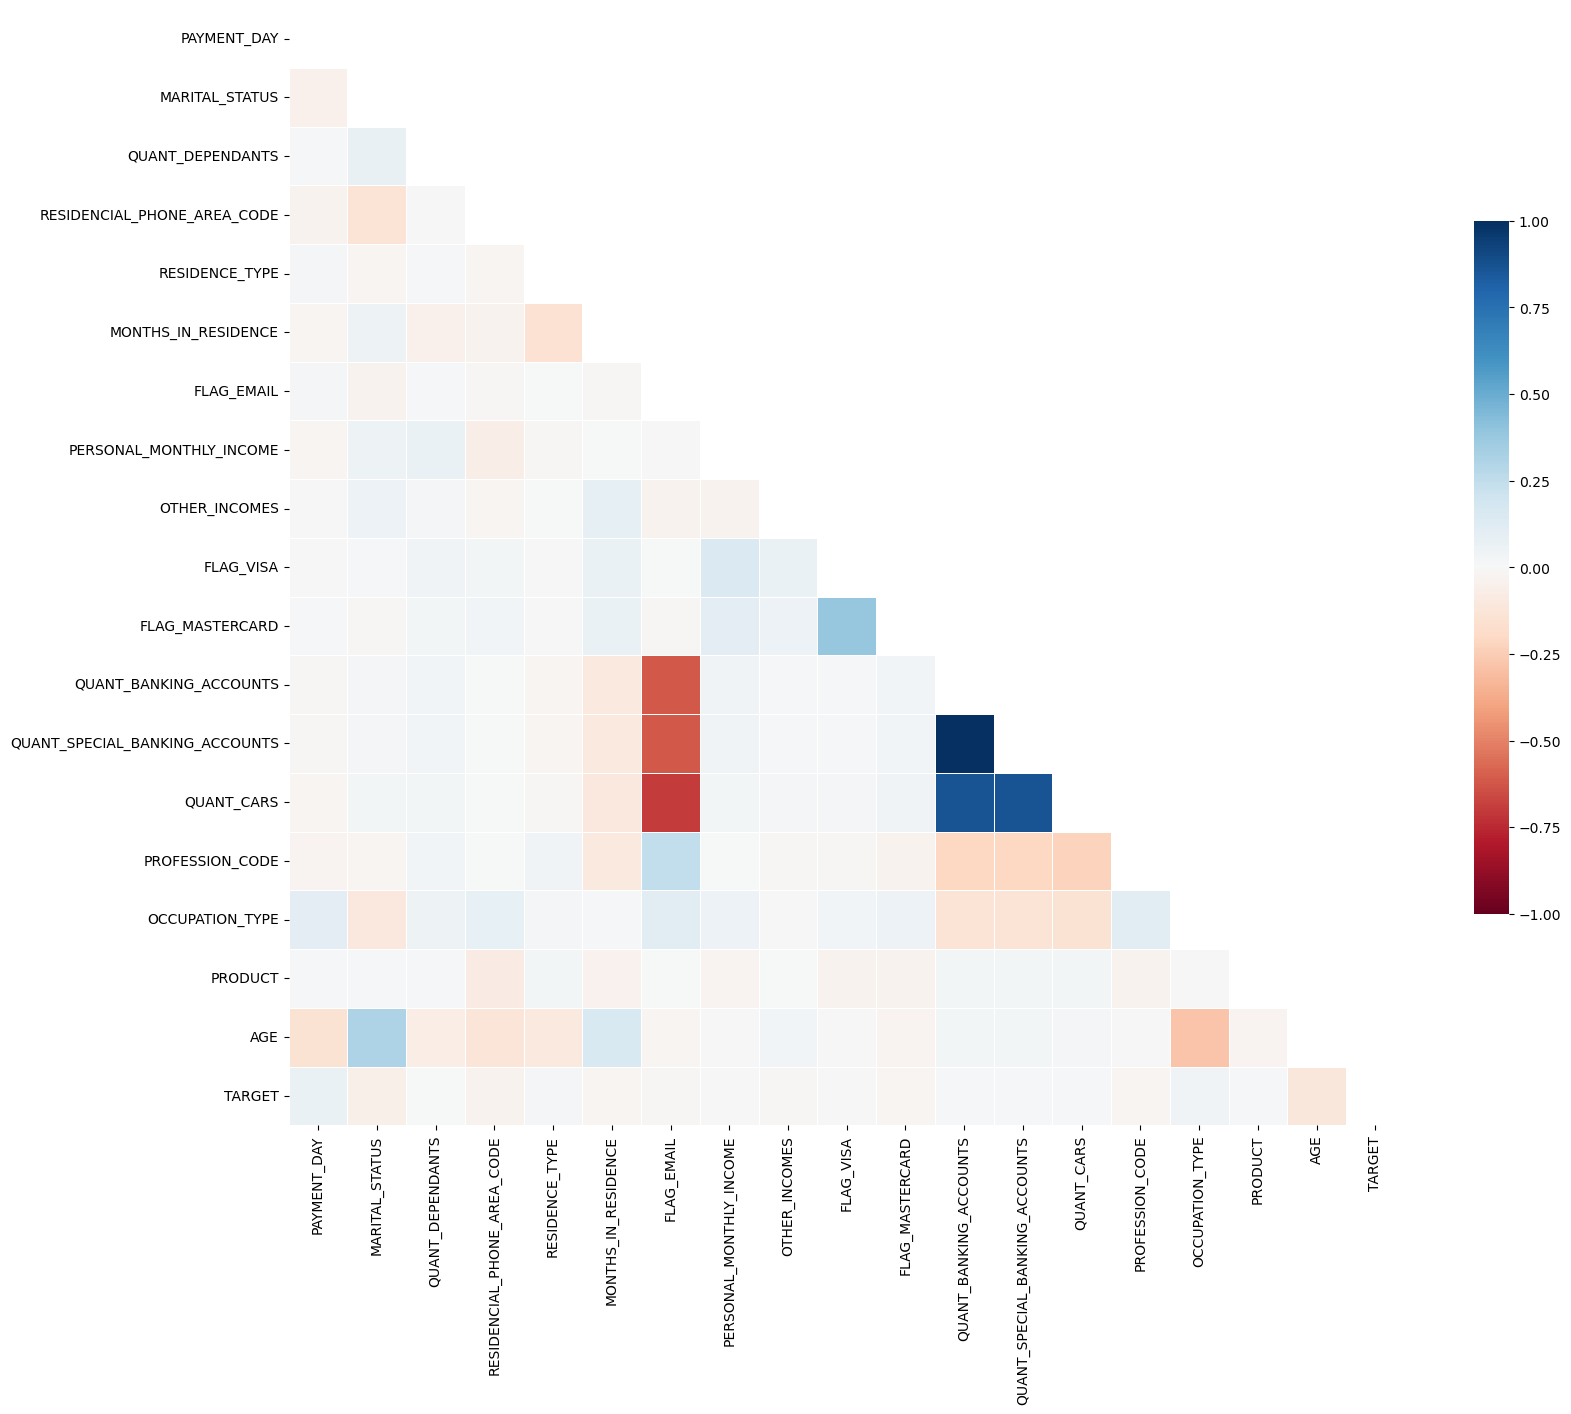

In [41]:
#Let's create the correlation matrix again for remaining features 
correlation(df.iloc[:,1:])

According to the correlation matrix, following features have a high correlation with each other.
- QUANT_BANKING_ACCOUNTS
- QUANT_SPECIAL_BANKING_ACCOUNTS
- QUANT_CARS
- FLAG_EMAIL

Keep one and remove the rest, as they all have a linear relationship. 

In [42]:
## Removing Columns 

drop_list_4 = ['QUANT_SPECIAL_BANKING_ACCOUNTS', 'QUANT_CARS', 'FLAG_EMAIL']

df.drop(columns = drop_list_4, inplace=True)

df.shape

(50000, 26)

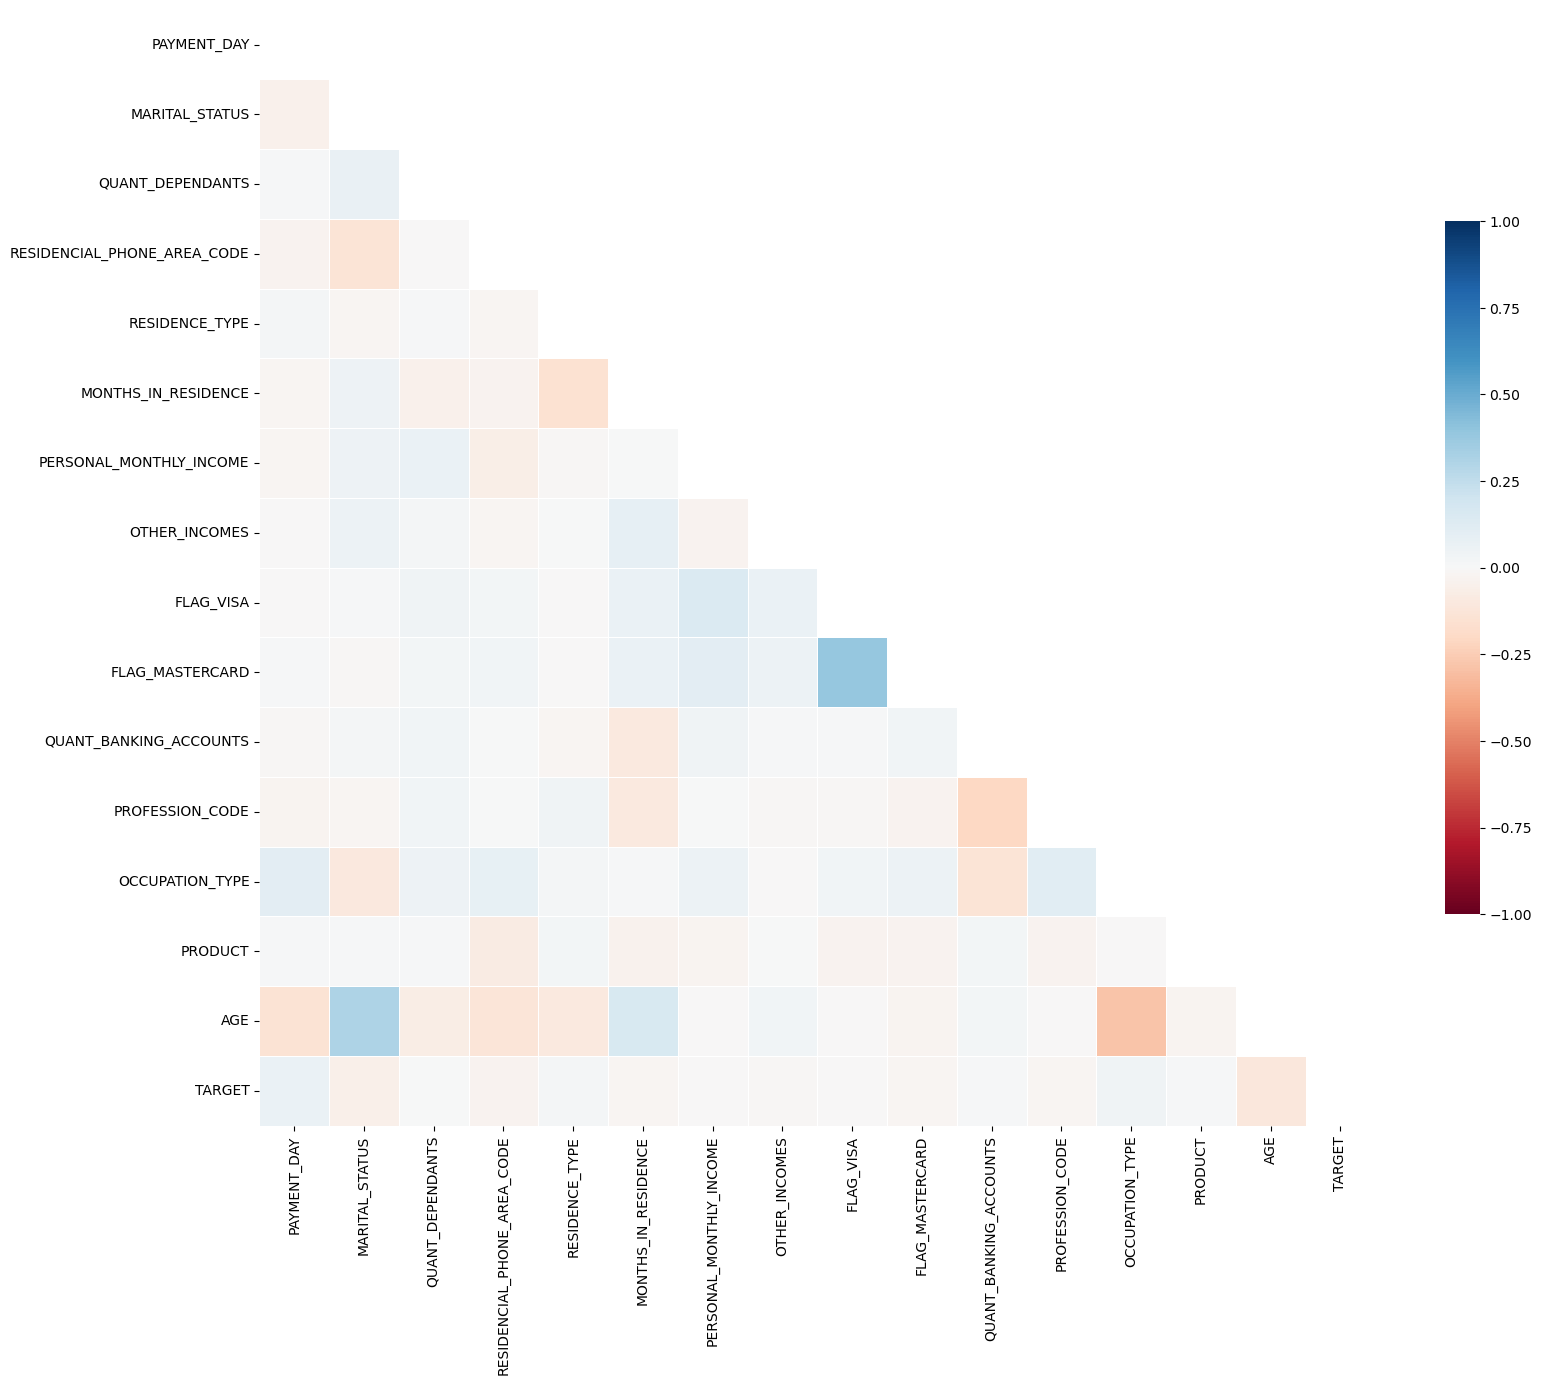

In [43]:
## Correlation HeatMap after removing correlated features 

correlation(df.iloc[:,1:])

### Domain Expertise Integration
Throughout the feature engineering and selection process, we will leverage domain expertise to identify any features that should be excluded based on a deeper understanding of the data and the problem being addressed. This might include features not flagged by the automated selection process.

Following features will be removed based on their nature and relevancy to the model.

- ID_CLIENT
- SEX
- RESIDENCIAL_PHONE_AREA_CODE
- PROFESSIONAL_STATE
- RESIDENCIAL_ZIP_3
- PROFESSIONAL_ZIP_3
- APPLICATION_SUBMISSION_TYPE


Reference: https://www.experian.com/blogs/ask-experian/address-information-does-not-impact-credit-scores/

In [44]:
# Removing Features based on the domain knowledge

drop_list_5 = ['ID_CLIENT', 'SEX', 'RESIDENCIAL_PHONE_AREA_CODE','PROFESSIONAL_STATE', 
               'RESIDENCIAL_ZIP_3', 'PROFESSIONAL_ZIP_3', 'APPLICATION_SUBMISSION_TYPE']

df.drop(columns = drop_list_5, inplace=True)

df.shape

(50000, 19)

# Feature Selection

### Feature Engineering

Engineering a new feature named "TOTAL_INCOME" by adding Personal_Monthly_Income and Other_Income. Both are in same units: Monthly income in Brazilian currency (R$).

In [45]:
# Creating a new feature replacing monthly and other income columns 

df['TOTAL_INCOME'] = df['PERSONAL_MONTHLY_INCOME'] + df['OTHER_INCOMES']

drop_list_6 = ['PERSONAL_MONTHLY_INCOME', 'OTHER_INCOMES']

df = df.drop(columns = drop_list_6)

df.shape

(50000, 18)

<Axes: xlabel='TOTAL_INCOME', ylabel='Count'>

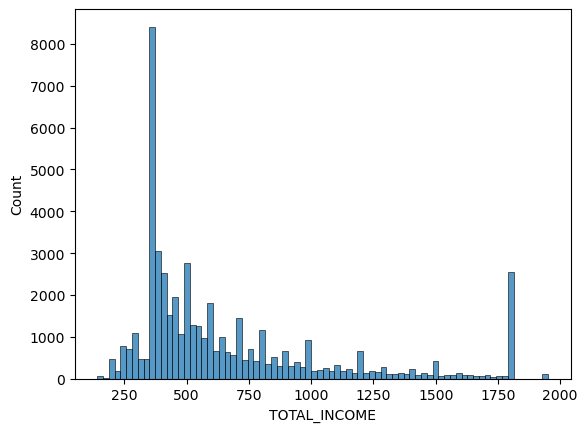

In [46]:
## generate a histogram to check the distribution

sns.histplot(df['TOTAL_INCOME'])

In [47]:
df.shape

(50000, 18)

### Feature Importance using a  Extra Tree Classifier

In [48]:
# Define a function to encode data to get feature importance

def encoder_for_feature_importance(df, categorical_cols, numerical_cols, other_cols, target):
    
    # Use label encoding for categorical features
    le = LabelEncoder()
    cat_df = df[categorical_cols]
    for col in categorical_cols:
        cat_df[col] = le.fit_transform(cat_df[col]).astype(object)
    
    # Use Standard Scaler to sale down numerical features 
    ss = StandardScaler()
    scaled = pd.DataFrame(ss.fit_transform(df[numerical_cols]), columns = numerical_cols)
    
    # Already encoded features 
    others = df[other_cols]
    target_col = df[target]
    
    # Concatanating all 4 dataframes together
    df_to_model = pd.concat([cat_df.reset_index(drop = True),
                          scaled.reset_index(drop = True),
                          others.reset_index(drop = True), 
                          target_col.reset_index(drop = True)], axis=1)
    
    return df_to_model
    
    

In [49]:
## Filtering features based on thier nature

categorical = ['PRODUCT', 'PAYMENT_DAY', 'OCCUPATION_TYPE','MARITAL_STATUS', 'RESIDENCE_TYPE','RESIDENCIAL_STATE', 
                    'FLAG_RESIDENCIAL_PHONE', 'PROFESSION_CODE','FLAG_PROFESSIONAL_PHONE','COMPANY']

numerical = [ 'AGE', 'QUANT_DEPENDANTS', 'MONTHS_IN_RESIDENCE', 'TOTAL_INCOME', 'QUANT_BANKING_ACCOUNTS']

other = ['FLAG_VISA','FLAG_MASTERCARD']

target = ['TARGET']

In [50]:
# encoding data using above function 

model_df = encoder_for_feature_importance(df, categorical, numerical, other, target)

In [51]:
model_df.head()

,PRODUCT,PAYMENT_DAY,OCCUPATION_TYPE,MARITAL_STATUS,RESIDENCE_TYPE,RESIDENCIAL_STATE,FLAG_RESIDENCIAL_PHONE,PROFESSION_CODE,FLAG_PROFESSIONAL_PHONE,COMPANY,AGE,QUANT_DEPENDANTS,MONTHS_IN_RESIDENCE,TOTAL_INCOME,QUANT_BANKING_ACCOUNTS,FLAG_VISA,FLAG_MASTERCARD,TARGET
0,0,2,4,6,1,19,1,9,0,0,-0.751062,0.30686,0.543012,0.561315,-0.74558,1,1,1
1,0,2,4,2,1,18,1,11,0,1,-0.617480,-0.56248,-0.877255,0.199499,-0.74558,0,0,1
2,0,2,2,2,1,19,1,11,0,0,-1.085018,-0.56248,0.008093,-0.403527,-0.74558,0,0,0
3,0,2,2,2,1,15,0,9,0,0,1.185881,-0.56248,0.008093,-0.403527,-0.74558,0,0,0
4,0,2,5,2,1,18,1,9,0,0,0.317596,-0.56248,0.238669,1.284946,-0.74558,0,0,1


In [52]:
## Defining X and y for model training (For Feature Selection)

X_i = model_df.drop(['TARGET'],axis =1)
y_i = model_df['TARGET']

In [53]:
## Splitting Data for Train and Test

X_train_, X_test_, y_train_, y_test_ = train_test_split( X_i, y_i, test_size=0.2, random_state=42)

In [54]:
## Model building and training 

rf = ExtraTreesClassifier(random_state=42)

rf.fit(X_train_,y_train_)

ExtraTreesClassifier(random_state=42)

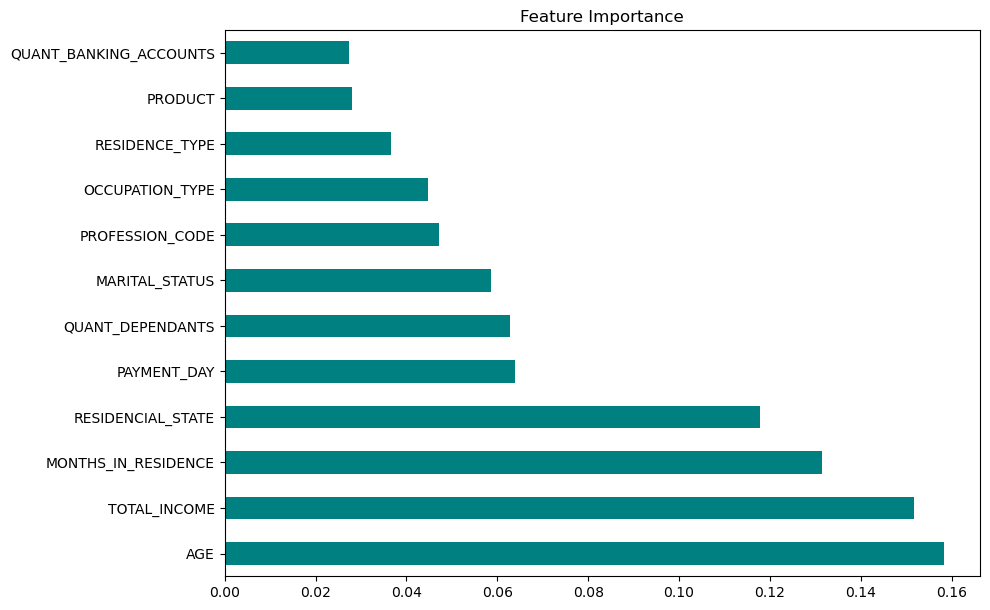

In [55]:
## Plotting feature importances 

feature_names = model_df.columns.to_list()[:-1]
feature_importances = rf.feature_importances_

feat_importances = pd.Series(feature_importances, feature_names)

fig, ax = plt.subplots(figsize=(12, 8))
feat_importances.nlargest(12).plot(kind='barh', ax=ax, color='teal', figsize=(10, 6))
plt.tight_layout()
plt.title('Feature Importance')
plt.show()

### Recursive Feature Elimination

In [56]:
## Initialize RFE Model
rfe = RFE(estimator = DecisionTreeClassifier(), n_features_to_select = 7)

rfe.fit(X_i, y_i)
for i, col in zip(range(X_i.shape[1]),X_i.columns ):
    if rfe.support_[i] == True:
        print(col)    

PAYMENT_DAY
OCCUPATION_TYPE
RESIDENCIAL_STATE
PROFESSION_CODE
AGE
MONTHS_IN_RESIDENCE
TOTAL_INCOME


Total of 7 features are selected. 
Selected Features are as follows.
- PAYMENT_DAY
- OCCUPATION_TYPE
- RESIDENCIAL_STATE
- PROFESSION_CODE
- AGE
- MONTHS_IN_RESIDENCE
- TOTAL_INCOME


### Encoding

In [57]:
## Defining a function to carryout encoding and scaling

def encoder(df, categorical_cols, numerical_cols, target):
    
    ## Use Standard Scaler for scaling
    ss = StandardScaler()
    
    ## One-hot encoding for categorical columns 
    onehot_encoded = pd.get_dummies(df[categorical_cols].astype(object))
    
    scaled = pd.DataFrame(ss.fit_transform(df[numerical_cols]), columns = numerical_cols)
    
    target_col = df[target]
    
    ## Concatanating altogether to create the final dataframe for modelling
    df_to_model = pd.concat([scaled.reset_index(drop = True), 
                             onehot_encoded.reset_index(drop = True), 
                             target_col.reset_index(drop = True)], axis=1)
    
    return df_to_model

In [58]:
## Seperating selected features based on their data type

num = ['AGE', 'TOTAL_INCOME', 'QUANT_DEPENDANTS', 'MONTHS_IN_RESIDENCE']
cat = ['RESIDENCIAL_STATE', 'PAYMENT_DAY', 'MARITAL_STATUS']
target = ['TARGET']

In [59]:
## Using defined function to encode data

encoded_df_final = encoder(df, cat, num, target )
encoded_df_final.shape

(50000, 46)

### Spliting Data

In [60]:
## Assigning X and y

X = encoded_df_final.drop(['TARGET'],axis =1)
y = encoded_df_final['TARGET']

In [61]:
## Splitting data for training and testing

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state = 25, stratify=y)

### SMOTE Resampling

In [62]:
y_train.value_counts()

0    29567
1    10433
Name: TARGET, dtype: int64

In [63]:
## Addressing Class imbalance using SMOTE Resampler

smote = SMOTE(sampling_strategy='auto', random_state = 25, k_neighbors = 2)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

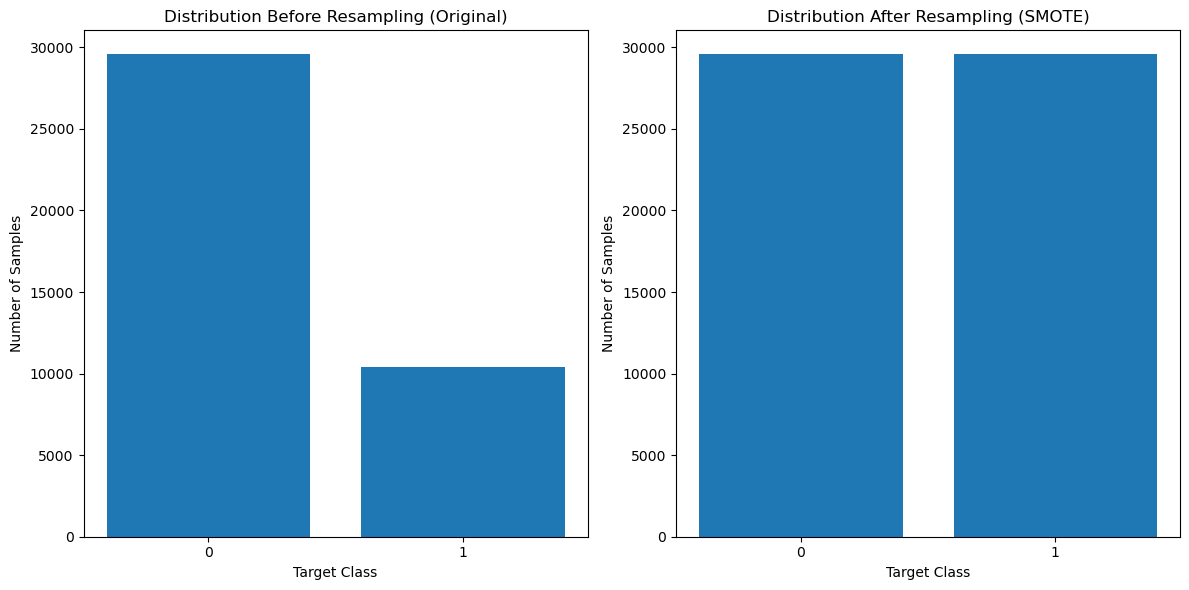

In [64]:
# Create the figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot the distribution of target variable before resampling 
ax1.bar(y_train.value_counts().index, y_train.value_counts().values)
ax1.set_xticks([0, 1])
ax1.set_xlabel("Target Class")
ax1.set_ylabel("Number of Samples")
ax1.set_title("Distribution Before Resampling (Original)")

# Plot the distribution of target variable after resampling 
ax2.bar(y_train_resampled.value_counts().index, y_train_resampled.value_counts().values)
ax2.set_xticks([0, 1])
ax2.set_xlabel("Target Class")
ax2.set_ylabel("Number of Samples")
ax2.set_title("Distribution After Resampling (SMOTE)")

# Adjust layout to prevent overlapping elements
plt.tight_layout()

# Display the plot
plt.show()

## Model Selection

Random Forest Test Accuracy: 0.6645
Logistic Regression Test Accuracy: 0.6045
Decision Tree Test Accuracy: 0.6105
Gradient Boosting Test Accuracy: 0.6749
K-Nearest Neighbors Test Accuracy: 0.5399
XGBoost Test Accuracy: 0.7023


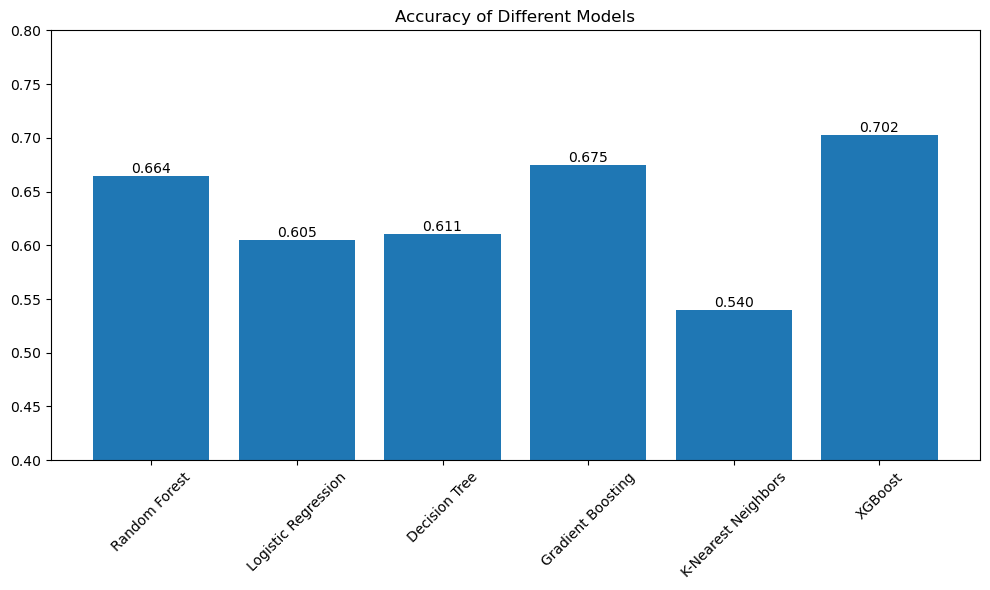

In [65]:
## initialize different models
results = {}
models = {
    'Random Forest': RandomForestClassifier(random_state=25),
    'Logistic Regression': LogisticRegression(random_state=25),
    'Decision Tree': DecisionTreeClassifier(random_state=25),
    'Gradient Boosting': GradientBoostingClassifier(random_state=25),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'XGBoost': xgb.XGBClassifier(random_state=25),
   }

## initialize lists to store model names and accuracies
model_names = []
test_accuracy = []

## train and evaluate each model
## looping each model to compare eachother 

for model_name, model in models.items():
    
    model.fit(X_train_resampled, y_train_resampled)
    
    ## get the predictions for test set
    y_pred = model.predict(X_test)

    ## Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    ## Store model names and accuracies in predefined lists
    model_names.append(model_name)
    test_accuracy.append(accuracy)
    
    print(f"{model_name} Test Accuracy: {accuracy:.4f}")
    

# create a bar plot to visualize accuracies
plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, test_accuracy)
plt.title('Accuracy of Different Models')

# set y-axis limits
plt.ylim(0.4, 0.8)

# rotate x-axis labels for readability
plt.xticks(rotation=45)
plt.tight_layout()

# add annotations in the middle of each bar
for bar in bars:
    y_val = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, y_val, f'{y_val:.3f}', ha='center', va='bottom')


plt.show()

### Selected Models

Based on the above figure, the highest accuracy acheived models were selected for further analysis. Selected models are:

- Random Forest
- XGBoost

# Model Training 

## Model 1 : Random Forest

In [66]:
## Configure the model - RandomForest with default Parameters
model1 = RandomForestClassifier(random_state = 25)

## Fit the model on training dataset
model1.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(random_state=25)

#### Hyper parameter tunning for Random Forest Model (model1)

In [67]:
## Define a dictionary to hold the hyperparameter grid
parameter_grid = {'max_depth':[1,3,5],
              'n_estimators':[100, 200, 300]}

# Create GridSearchCV for Random Forest model (model1)
gridsearch_rf = GridSearchCV(model1, parameter_grid, cv = 5, scoring = 'accuracy') 

# Fit the GridSearchCV object to the resampled training data
gridsearch_rf.fit(X_train_resampled,y_train_resampled)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=25),
             param_grid={'max_depth': [1, 3, 5],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [68]:
## Get the best model with optimum parameters from the gridsearch results

model1_improved = gridsearch_rf.best_estimator_

## Print the best parameters
print("Best Hyperparameters for Random Forest model(model1):", gridsearch_rf.best_params_)

Best Hyperparameters for Random Forest model(model1): {'max_depth': 5, 'n_estimators': 300}


In [69]:
# Fit training dataset to a new model with optimum parameters 
model1_improved.fit(X_train_resampled,y_train_resampled)

RandomForestClassifier(max_depth=5, n_estimators=300, random_state=25)

>1, train: 0.587, test: 0.547
>2, train: 0.590, test: 0.543
>3, train: 0.597, test: 0.548
>4, train: 0.606, test: 0.553
>5, train: 0.612, test: 0.561
>6, train: 0.621, test: 0.558
>7, train: 0.633, test: 0.562
>8, train: 0.643, test: 0.567
>9, train: 0.660, test: 0.577
>10, train: 0.677, test: 0.586
>11, train: 0.698, test: 0.591
>12, train: 0.718, test: 0.594
>13, train: 0.740, test: 0.602
>14, train: 0.763, test: 0.603
>15, train: 0.788, test: 0.610
>16, train: 0.811, test: 0.614
>17, train: 0.837, test: 0.622
>18, train: 0.860, test: 0.623
>19, train: 0.882, test: 0.629
>20, train: 0.904, test: 0.634
>21, train: 0.919, test: 0.636
>22, train: 0.936, test: 0.639
>23, train: 0.948, test: 0.642
>24, train: 0.962, test: 0.645
>25, train: 0.970, test: 0.650
>26, train: 0.977, test: 0.653
>27, train: 0.984, test: 0.652
>28, train: 0.987, test: 0.657
>29, train: 0.991, test: 0.658


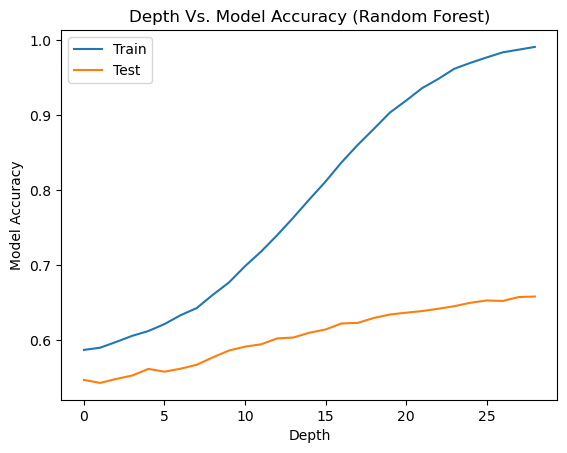

In [70]:
## Plotting against different max_depths
train_scores, test_scores = list(), list()

# evaluate a decision tree for each depth
for i in range(1, 30):
    
    # configure the model
    model = RandomForestClassifier(random_state=25,max_depth= i, n_estimators= 300)
    
    # fit model on the training dataset
    model.fit(X_train_resampled,y_train_resampled)
    
    # evaluate on the train dataset
    train_yhat = model.predict(X_train_resampled)
    train_accuracy = accuracy_score(y_train_resampled, train_yhat)
    train_scores.append(train_accuracy)
    
    # evaluate on the test dataset
    test_yhat = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, test_yhat)
    test_scores.append(test_accuracy)
    
    # summarize progress
    print('>%d, train: %.3f, test: %.3f' % (i, train_accuracy, test_accuracy))
    
# plot of train and test scores vs tree depth
plt.plot(train_scores, '-', label='Train')
plt.plot(test_scores, '-', label='Test')
plt.xlabel("Depth")
plt.ylabel("Model Accuracy")
plt.title("Depth Vs. Model Accuracy (Random Forest)")
plt.legend()
plt.show()

>100, train: 0.999, test: 0.664
>200, train: 0.999, test: 0.667
>300, train: 0.999, test: 0.667


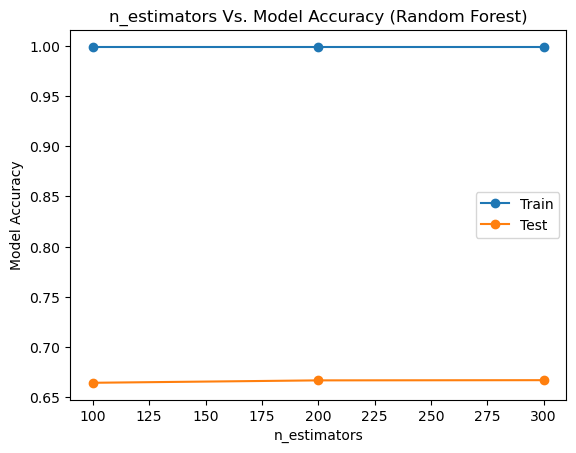

In [71]:
## Plotting against different estimators
train_scores, test_scores = list(), list()

# evaluate a decision tree for each depth
for i in parameter_grid['n_estimators']:
    
    # configure the model
    model = RandomForestClassifier(random_state=25,max_depth = None, n_estimators= i)
    
    # fit model on the training dataset
    model.fit(X_train_resampled,y_train_resampled)
    
    # evaluate on the train dataset
    train_yhat = model.predict(X_train_resampled)
    train_accuracy = accuracy_score(y_train_resampled, train_yhat)
    train_scores.append(train_accuracy)
    
    # evaluate on the test dataset
    test_yhat = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, test_yhat)
    test_scores.append(test_accuracy)
    
    # summarize progress
    print('>%d, train: %.3f, test: %.3f' % (i, train_accuracy, test_accuracy))
    
# plot of train and test scores vs n_estimators
plt.plot(parameter_grid['n_estimators'], train_scores, '-o', label='Train')
plt.plot(parameter_grid['n_estimators'], test_scores, '-o', label='Test')
plt.xlabel("n_estimators")
plt.ylabel("Model Accuracy")
plt.title("n_estimators Vs. Model Accuracy (Random Forest)")
plt.legend()
plt.show()

## Model 2 : XGBoost

In [72]:
#Model2 - XGBoost with default parameters

model2 =  xgb.XGBClassifier(objective='multi:softmax', num_class=8)
model2.fit(X_train_resampled,y_train_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None, num_class=8,
              num_parallel_tree=None, ...)

#### Hyperparameter Tuning : XGBoost

In [73]:
## Define a dictionary to hold the hyperparameter grid
param_grid = {
    'max_depth': [1, 3, 5],
    'learning_rate': [0.01, 0.1],
    'n_estimators': [100, 200, 300]}

## Initialize and train gridsearchcv
gridsearch_xg = GridSearchCV(model2, param_grid, cv=10, scoring = 'accuracy') 
gridsearch_xg.fit(X_train_resampled,y_train_resampled)

GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_class=8,
                                     num_parallel_tree=None, ...),
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [1, 3, 5],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [74]:
## Get the best model with optimum parameters from the gridsearch results
model2_improved = gridsearch_xg.best_estimator_

## Print best results
print("Best Hyperparameters for XGBoost model(model3):", gridsearch_xg.best_params_)

Best Hyperparameters for XGBoost model(model3): {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300}


In [75]:
model2_improved.fit(X_train_resampled,y_train_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None, num_class=8,
              num_parallel_tree=None, ...)

>1, train: 0.640, test: 0.604
>2, train: 0.748, test: 0.697
>3, train: 0.780, test: 0.704
>4, train: 0.804, test: 0.701
>5, train: 0.829, test: 0.705
>6, train: 0.860, test: 0.697
>7, train: 0.886, test: 0.687
>8, train: 0.912, test: 0.686
>9, train: 0.939, test: 0.682
>10, train: 0.961, test: 0.681
>11, train: 0.981, test: 0.674
>12, train: 0.992, test: 0.672
>13, train: 0.996, test: 0.670
>14, train: 0.998, test: 0.674
>15, train: 0.999, test: 0.669
>16, train: 0.999, test: 0.669
>17, train: 0.999, test: 0.672
>18, train: 0.999, test: 0.669
>19, train: 0.999, test: 0.667
>20, train: 0.999, test: 0.666
>21, train: 0.999, test: 0.667
>22, train: 0.999, test: 0.667
>23, train: 0.999, test: 0.667
>24, train: 0.999, test: 0.665
>25, train: 0.999, test: 0.667
>26, train: 0.999, test: 0.665
>27, train: 0.999, test: 0.672
>28, train: 0.999, test: 0.666
>29, train: 0.999, test: 0.665


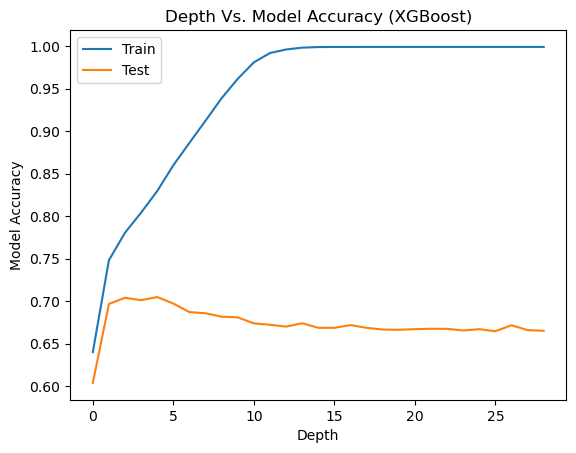

In [76]:
## Plotting against different max_depths
train_scores, test_scores = list(), list()

# evaluate a decision tree for each depth
for i in range(1, 30):
    
    # configure the model
    model = xgb.XGBClassifier(random_state=25,max_depth= i, n_estimators= 300)
    
    # fit model on the training dataset
    model.fit(X_train_resampled,y_train_resampled)
    
    # evaluate on the train dataset
    train_yhat = model.predict(X_train_resampled)
    train_accuracy = accuracy_score(y_train_resampled, train_yhat)
    train_scores.append(train_accuracy)
    
    # evaluate on the test dataset
    test_yhat = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, test_yhat)
    test_scores.append(test_accuracy)
    
    # summarize progress
    print('>%d, train: %.3f, test: %.3f' % (i, train_accuracy, test_accuracy))
    
# plot of train and test scores vs tree depth
plt.plot(train_scores, '-', label='Train')
plt.plot(test_scores, '-', label='Test')
plt.xlabel("Depth")
plt.ylabel("Model Accuracy")
plt.title("Depth Vs. Model Accuracy (XGBoost)")
plt.legend()
plt.show()

>100, train: 0.812, test: 0.702
>200, train: 0.841, test: 0.700
>300, train: 0.860, test: 0.697


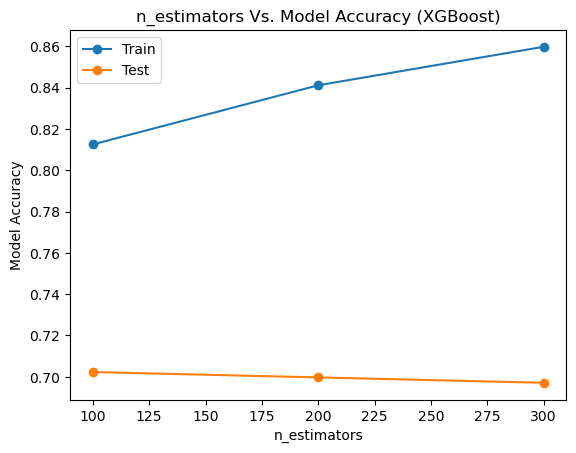

In [77]:
# Plotting against different N_estimators

train_scores, test_scores = list(), list()

# evaluate a decision tree for each depth
for i in param_grid['n_estimators']:
    
    # configure the model
    model = xgb.XGBClassifier(random_state=25,max_depth= None, n_estimators= i)
    
    # fit model on the training dataset
    model.fit(X_train_resampled,y_train_resampled)
    
    # evaluate on the train dataset
    train_yhat = model.predict(X_train_resampled)
    train_accuracy = accuracy_score(y_train_resampled, train_yhat)
    train_scores.append(train_accuracy)
    
    # evaluate on the test dataset
    test_yhat = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, test_yhat)
    test_scores.append(test_accuracy)
    
    # summarize progress
    print('>%d, train: %.3f, test: %.3f' % (i, train_accuracy, test_accuracy))
    
# plot of train and test scores vs tree depth
plt.plot(param_grid['n_estimators'], train_scores, '-o', label='Train')
plt.plot(param_grid['n_estimators'], test_scores, '-o', label='Test')
plt.xlabel("n_estimators")
plt.ylabel("Model Accuracy")
plt.title("n_estimators Vs. Model Accuracy (XGBoost)")
plt.legend()
plt.show()

# Model Evaluation

Recall, Precision , F1 score, Accuracy and ROC AUC score are the main evaluation methods used

In [78]:
# function to get confusion matrix and classification report
def report(model):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                  display_labels=model.classes_)
    disp.plot()
    plt.show()
    print(classification_report(y_test, y_pred,zero_division=1))
    return


### Model 1 Evaluation

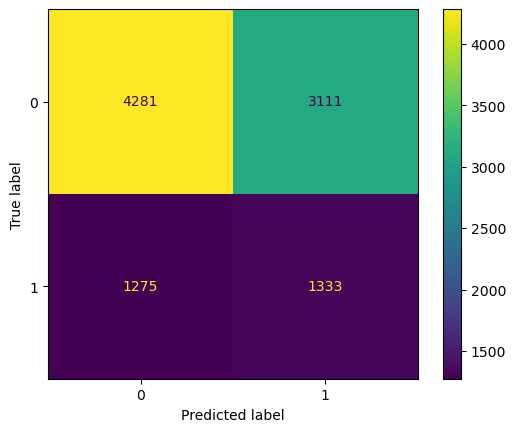

              precision    recall  f1-score   support

           0       0.77      0.58      0.66      7392
           1       0.30      0.51      0.38      2608

    accuracy                           0.56     10000
   macro avg       0.54      0.55      0.52     10000
weighted avg       0.65      0.56      0.59     10000



In [79]:
report(model1_improved)

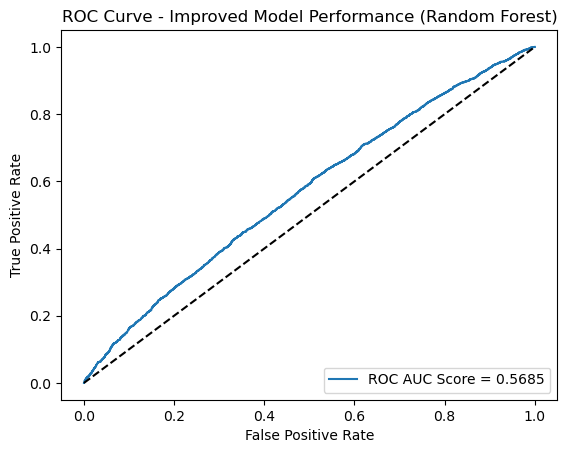

In [80]:
#ROC_AUC for Random Forest
# Predict class probabilities for the test data using the best model
y_pred_proba = model1_improved.predict_proba(X_test)[:, 1]

fpr_1, tpr_1, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate the area under the ROC curve (AUC)
roc_auc_1 = auc(fpr_1, tpr_1)

# Create the ROC curve plot
plt.figure()

#Plot the graph
plt.plot(fpr_1, tpr_1, label='ROC AUC Score = %0.4f' % roc_auc_1)
plt.plot(fpr_1, fpr_1, linestyle = '--', color='k')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Improved Model Performance (Random Forest)')
plt.legend(loc="lower right")
plt.show()

### Model 2 Evaluation

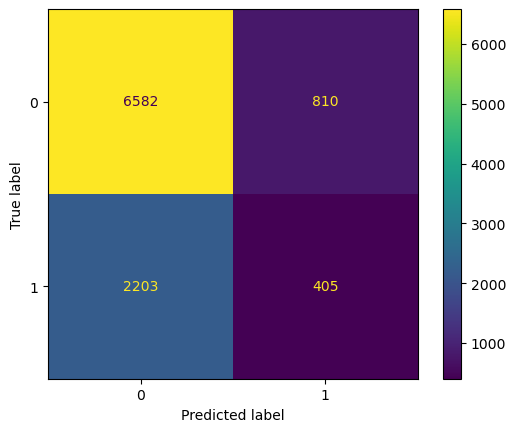

              precision    recall  f1-score   support

           0       0.75      0.89      0.81      7392
           1       0.33      0.16      0.21      2608

    accuracy                           0.70     10000
   macro avg       0.54      0.52      0.51     10000
weighted avg       0.64      0.70      0.66     10000



In [81]:
report(model2_improved)

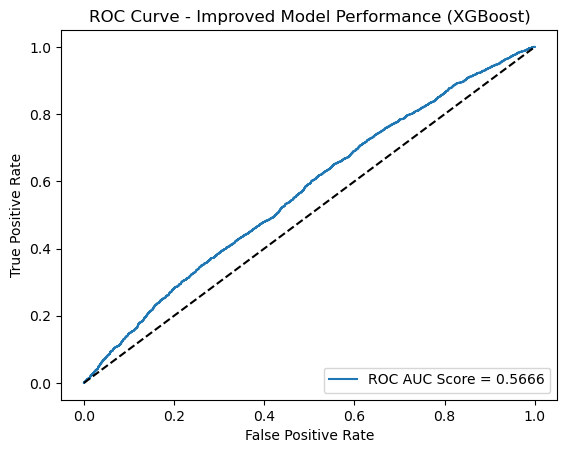

In [82]:
#XGBoost ROC_AUC
# Predict class probabilities for the test data using the best model
y_pred_proba_2 = model2_improved.predict_proba(X_test)[:, 1]

fpr_2, tpr_2, thresholds = roc_curve(y_test, y_pred_proba_2)

# Calculate the area under the ROC curve (AUC)
roc_auc_2 = auc(fpr_2, tpr_2)

# Create the ROC curve plot
plt.figure()

# Plot the graph
plt.plot(fpr_2, tpr_2, label='ROC AUC Score = %0.4f' % roc_auc_2)
plt.plot(fpr_2, fpr_2, linestyle = '--', color='k')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Improved Model Performance (XGBoost)')
plt.legend(loc="lower right")
plt.show()

# Results

The final model can build using XGBoost classifier.

In [85]:
best_model = xgb.XGBClassifier(learning_rate=0.1,max_depth=5,n_estimators=300)

In [86]:
best_model.fit(X_train_resampled, y_train_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)